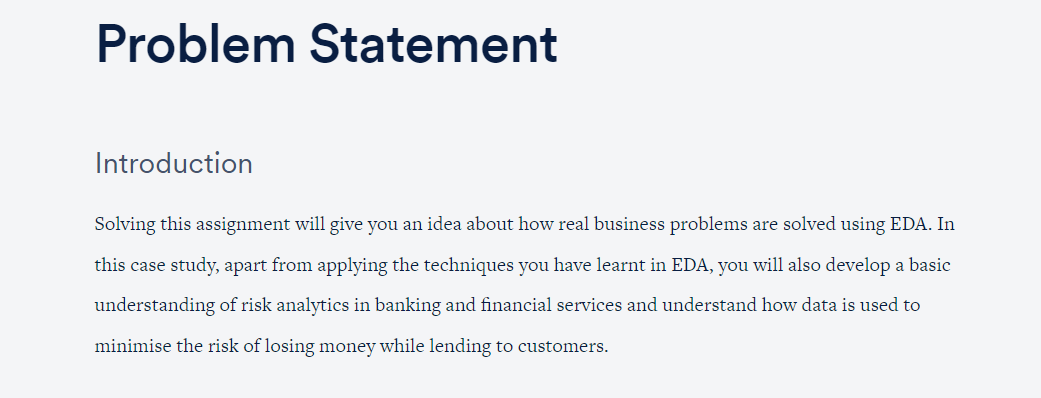
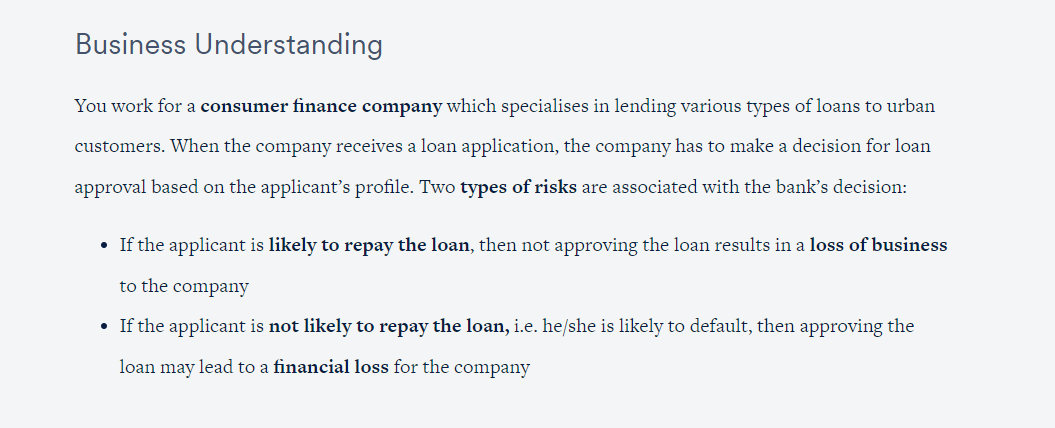
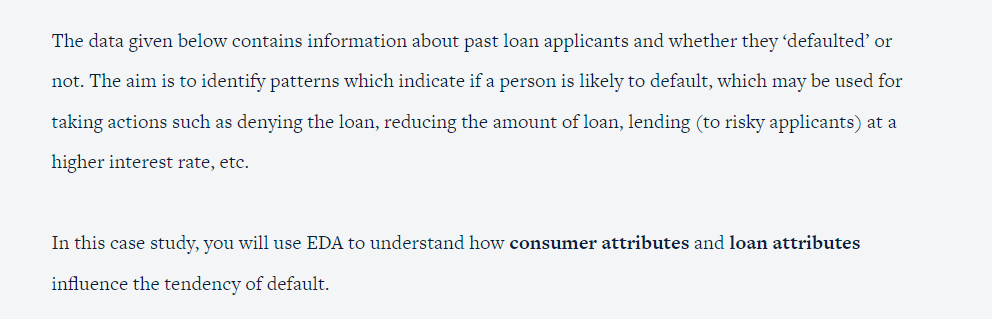
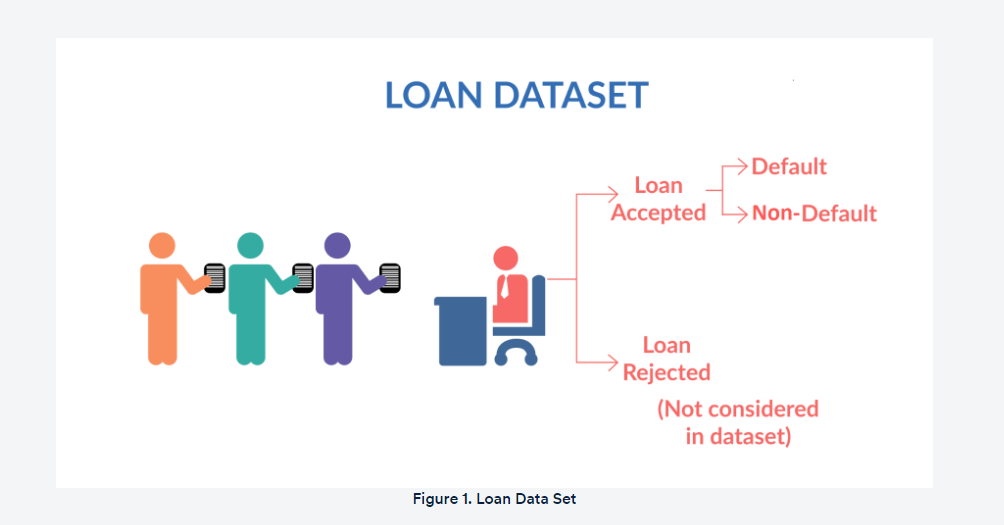
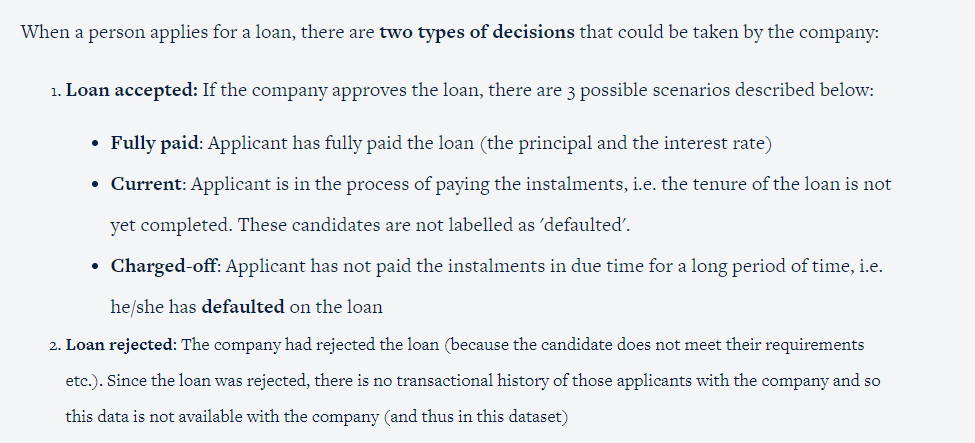

### Steps or Summary :
- Import Necessary Libraries
- Load the data and Data dictionary
- Data Understanding
- Missing Value Check
- Segmentation of Column
- Analysis:
    - Univariate Analysis (One Variable at a time)
    - Bivariate Analysis (Two Variable at a time)
    - Multivariate Analysis (More than two Variables at a time)

### Import Necessary Libraries


In [244]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt , seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import style
sns.set(style='whitegrid')

### Load the Data

In [245]:
loan=pd.read_csv('loan.csv')
# To display maximum rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [246]:
data_dictionary = pd.read_excel('Data_Dictionary.xlsx')

In [247]:
loan.shape

(39717, 111)

In [248]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [249]:
data_dictionary.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [250]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [251]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

#### Observation -  Looking at the description, there are a lot of missing or null values, so we have to perform Data Cleaning steps

### Missing Values Check

In [252]:
loan_original=loan.copy()

##### Let's create a copy of the original DataFrame before starting the cleaning operation. If we need to refer the original data at some point of analysis , then the "loan_original" can be checked. We'll use "loan" throughout for our analysis

In [253]:
loan_missingvalues=round( 100 * loan.isnull().mean() , 2 )
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)

bc_open_to_buy                    100.00
acc_open_past_24mths              100.00
bc_util                           100.00
mo_sin_old_il_acct                100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_rev_tl_op             100.00
mo_sin_rcnt_tl                    100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_op_rev_tl                     100.00
num_rev_accts                     100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_2

#### Let's remove the columns with 100% missing values first as they'll be of no use

In [254]:
loan = loan.drop(columns=loan_missingvalues[loan_missingvalues==100.00].index)

In [255]:
### check and validate the shape again
loan.shape

(39717, 57)

In [256]:
###check null or missing values again
loan_missingvalues=round( 100 * loan.isnull().mean() , 2 )
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

#### There are four columns where we have a lot of null or missing values ( more than 30%) . So we should also remove them in order to get exact picture

In [257]:
loan_missingvalues[loan_missingvalues>30.00]

desc                      32.59
mths_since_last_delinq    64.66
mths_since_last_record    92.99
next_pymnt_d              97.13
dtype: float64

In [258]:
loan = loan.drop(columns=loan_missingvalues[loan_missingvalues>30.00].index)

In [259]:
### check and validate the shape again
loan.shape

(39717, 53)

#### Let us have a look at the above columns to analyze further. Lets check the count of unique values present in each column.

In [260]:
loan.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [261]:
loan[['pymnt_plan','initial_list_status','policy_code','collections_12_mths_ex_med','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']].head()

pymnt_plan initial_list_status  policy_code  collections_12_mths_ex_med  \
0          n                   f            1                         0.0   
1          n                   f            1                         0.0   
2          n                   f            1                         0.0   
3          n                   f            1                         0.0   
4          n                   f            1                         0.0   

  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0       INDIVIDUAL               0                       0.0            0   
1       INDIVIDUAL               0                       0.0            0   
2       INDIVIDUAL               0                       0.0            0   
3       INDIVIDUAL               0                       0.0            0   
4       INDIVIDUAL               0                       0.0            0   

   tax_liens  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

#### Since the above columns are having same data for all the rows , so these will not help us in analysis and hence we can remove these columns

In [262]:
loan = loan.drop( ['pymnt_plan','initial_list_status','policy_code','collections_12_mths_ex_med','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'] , axis=1 )

In [263]:
loan.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

In [264]:
### check percentage of null or missing values again
loan_missingvalues=round( 100 * loan.isnull().mean() , 2 )
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)

emp_title               6.19
emp_length              2.71
pub_rec_bankruptcies    1.75
last_pymnt_d            0.18
revol_util              0.13
title                   0.03
last_credit_pull_d      0.01
dtype: float64

In [265]:
### check count of null or missing values
loan_missingvalues=loan.isnull().sum() 
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)


emp_title               2459
emp_length              1075
pub_rec_bankruptcies     697
last_pymnt_d              71
revol_util                50
title                     11
last_credit_pull_d         2
dtype: int64

In [266]:
missing_columns=loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)
data_dictionary[ data_dictionary['LoanStatNew'].isin(missing_columns.index) ]

LoanStatNew                                        Description
19            emp_length  Employment length in years. Possible values ar...
20             emp_title  The job title supplied by the Borrower when ap...
36    last_credit_pull_d  The most recent month LC pulled credit for thi...
40          last_pymnt_d                    Last month payment was received
86  pub_rec_bankruptcies               Number of public record bankruptcies
91            revol_util  Revolving line utilization rate, or the amount...
95                 title            The loan title provided by the borrower

#### last_credit_pull_d, title, revol_util  and last_pymnt_d have minimal amount of missing values - 0.01% , 0.02% , 0.13% and 0.18% respectively. Upon checking the column description , we decided to remove nulls from here.
#### Also the columns emp_title and emp_length have 6.19% (2459 rows) and 2.71% ( 1075 rows ) missing values. These columns have information about the customer/borrower like their job title and their employment length in years. So we can remove this rows  as well where emp_title or  emp_length is missing .

In [267]:
loan=loan[ ( ~ loan.emp_length.isnull() ) & ( ~ loan.emp_title.isnull() ) &  ( ~ loan.title.isnull() ) & ( ~loan.revol_util.isnull() ) &  ( ~loan.last_pymnt_d.isnull() ) & ( ~loan.last_credit_pull_d.isnull() ) ]

In [268]:
#check value counts of null columns
loan_missingvalues=loan.isnull().sum()
missing_columns=loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)
for column in missing_columns.index:
    unique_percentage = ( loan[column].value_counts(normalize=True) * 100  ).head()
    print(f" Percentage of unique values in column '{column}':\n {unique_percentage} \n ")
    unique_count = ( loan[column].value_counts()  ).head()
    print(f" Count of unique values in column '{column}':\n {unique_count} \n ")

 Percentage of unique values in column 'pub_rec_bankruptcies':
 pub_rec_bankruptcies
0.0    95.877364
1.0     4.103423
2.0     0.019213
Name: proportion, dtype: float64 
 
 Count of unique values in column 'pub_rec_bankruptcies':
 pub_rec_bankruptcies
0.0    34931
1.0     1495
2.0        7
Name: count, dtype: int64 
 


#### Let's impute pub_rec_bankruptcies

In [269]:
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].median())

In [270]:
### check count of null or missing values
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

### Segmentation of Columns

In [271]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [272]:
loan.shape

(37087, 44)

#### Identification of relevant columns and variables
- There are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". This columns doesn't contribute to the loan defaulting in any way due to irrelevant information. Hence can be ignored or removed.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. Hence also can be ignored or removed.
- "funded_amnt" may not be needed because we only need info as to how much is funded in actual ,and also  we have "funded_amnt_inv" , but still we want to remove "funded_amnt".
- There are also some columns which will probably be used after approving the loan. Since we are analyzing the user details and the driving factors of loan defaulting before approving loan , we can safely ignore or remove the columns / variables corresponding to that scenario. Below is the list of these columns 
##### List of post-approval features columns / variables 
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [273]:
loan.nunique()

id                         37087
member_id                  37087
loan_amnt                    873
funded_amnt                 1030
funded_amnt_inv             7800
term                           2
int_rate                     368
installment                14749
grade                          7
sub_grade                     35
emp_title                  28683
emp_length                    11
home_ownership                 5
annual_inc                  4986
verification_status            3
issue_d                       55
loan_status                    3
url                        37087
purpose                       14
title                      18340
zip_code                     818
addr_state                    50
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21010
revol_util                  1082
total_acc 

In [274]:
# Categorical Column
cat_cols=['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status','purpose','inq_last_6mths','pub_rec', 'pub_rec_bankruptcies' , 'addr_state' , 'delinq_2yrs']
# Numerical Columns
num_cols=['loan_amnt', 'funded_amnt' , 'funded_amnt_inv','int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_util', 'total_acc', 'total_pymnt' , 'total_pymnt_inv']
# Date Columns
date_cols=['issue_d','earliest_cr_line','last_credit_pull_d']
# Not relevant to the analysis
extra_cols=[ "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "revol_bal","out_prncp","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","out_prncp_inv"]

In [276]:
loan=loan.drop(columns=extra_cols)

In [277]:
loan.shape

(37087, 27)

#### Looking into the object variables to check if they are required to be converted to numeric

In [278]:
newdf = loan.select_dtypes(include=object)
newdf.head()

term int_rate grade sub_grade emp_length home_ownership  \
1   60 months   15.27%     C        C4   < 1 year           RENT   
3   36 months   13.49%     C        C1  10+ years           RENT   
4   60 months   12.69%     B        B5     1 year           RENT   
5   36 months    7.90%     A        A4    3 years           RENT   
6   60 months   15.96%     C        C5    8 years           RENT   

  verification_status issue_d  loan_status             purpose addr_state  \
1     Source Verified  Dec-11  Charged Off                 car         GA   
3     Source Verified  Dec-11   Fully Paid               other         CA   
4     Source Verified  Dec-11      Current               other         OR   
5     Source Verified  Dec-11   Fully Paid             wedding         AZ   
6        Not Verified  Dec-11   Fully Paid  debt_consolidation         NC   

  earliest_cr_line revol_util  
1           Apr-99      9.40%  
3           Feb-96        21%  
4           Jan-96     53.90%  
5           Nov-04     28.30%  
6           Jul-05     85.60%

#### Convert int_rate, revol_util and term into numerical by making necessary impuatations

In [279]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float64')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float64')
loan['term'] = loan['term'].str.strip(' months').astype('int64')

In [281]:
#### Convert emp_length into numeric
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan['emp_length_dict'] = loan['emp_length'].apply( lambda x: emp_length_dict.get(x) )

#### Converting these datatypes to datetime -  issue_d , earliest_cr_line

In [282]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')

In [283]:
newdf = loan.select_dtypes(include=object)
newdf.head()

grade sub_grade emp_length home_ownership verification_status  loan_status  \
1     C        C4   < 1 year           RENT     Source Verified  Charged Off   
3     C        C1  10+ years           RENT     Source Verified   Fully Paid   
4     B        B5     1 year           RENT     Source Verified      Current   
5     A        A4    3 years           RENT     Source Verified   Fully Paid   
6     C        C5    8 years           RENT        Not Verified   Fully Paid   

              purpose addr_state  
1                 car         GA  
3               other         CA  
4               other         OR  
5             wedding         AZ  
6  debt_consolidation         NC

#### Let's split the date columns to month and year to get a proper year wise analysis or month wise analysis later if required

In [284]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [285]:
loan.issue_d_year.value_counts()

issue_d_year
2011    20156
2010    10795
2009     4424
2008     1485
2007      227
Name: count, dtype: int64

In [286]:
loan.earliest_cr_line.value_counts()

earliest_cr_line
1998-11-01    358
1999-10-01    351
1998-12-01    333
2000-10-01    324
2000-11-01    308
1997-12-01    301
1999-11-01    300
2000-09-01    288
1997-11-01    285
1998-10-01    285
1995-12-01    278
1999-12-01    277
2000-12-01    271
2000-01-01    269
2000-07-01    264
1996-11-01    258
1996-12-01    258
2001-09-01    256
2002-10-01    255
2000-08-01    255
2001-10-01    254
2000-05-01    245
2000-04-01    243
1999-09-01    242
1998-08-01    239
1999-01-01    235
2003-10-01    235
1999-08-01    234
2001-01-01    233
1997-10-01    231
1994-12-01    229
2002-09-01    227
1998-09-01    224
1996-01-01    224
2004-10-01    222
1997-01-01    221
2000-02-01    214
1996-10-01    213
2003-11-01    212
1995-11-01    211
2000-06-01    209
1994-01-01    208
2001-12-01    208
1999-02-01    207
1999-07-01    205
2000-03-01    202
2003-09-01    201
1997-08-01    200
1999-05-01    198
1993-12-01    197
2001-08-01    195
2004-09-01    195
1994-11-01    193
1999-03-01    193
2001-05-01 

#### We can see that for earliest_cr_line_year, there are years which are even greater than 2011 which is absurd since this column represents the earliest credit line for the customer.  Clearly, there is a year conversion issue resulting in 1964 to become 2064 and so on. Let's convert them back.

In [287]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

### Data Cleaning Done, Will start analyzing the data now.
### Since we need to compare between the people who fully paid and the ones who defaulted, we will filter the data accordingly

In [288]:
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape

(36021, 32)

In [289]:
loan_cleaned=loan.copy()

## Univariate Analysis

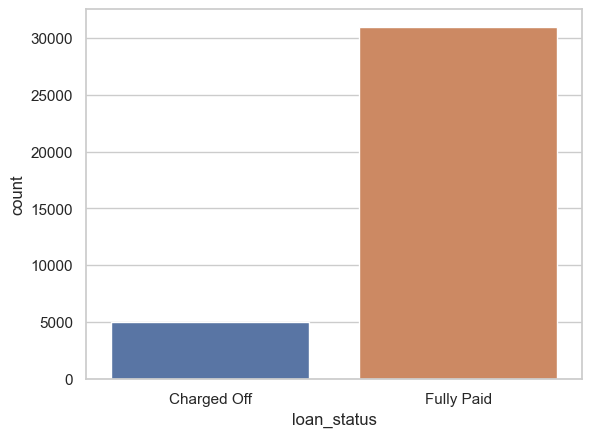

In [290]:
sns.countplot(x=loan["loan_status"],palette='deep')
plt.show()

In [291]:
round( 100* loan["loan_status"].value_counts(normalize=True) )

loan_status
Fully Paid     86.0
Charged Off    14.0
Name: proportion, dtype: float64

#### Observations - 
<b> We can infer that - </b>
1. Most of the loans are Fully paid
2. Around 14% loans are Charged Off

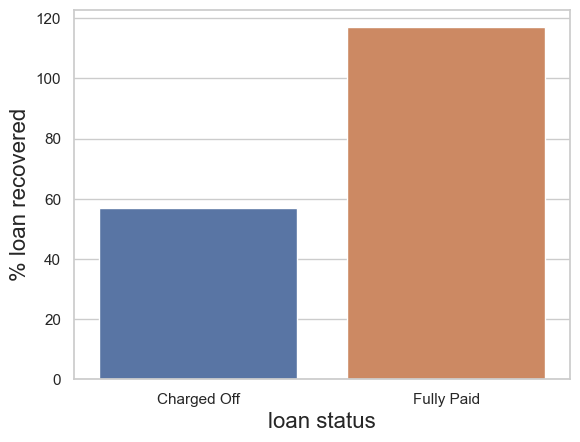

In [292]:
loan_status_pivot=pd.pivot_table(data=loan[["loan_status","loan_amnt","total_pymnt"]] , values=["loan_amnt","total_pymnt"] , index="loan_status" ,aggfunc=np.sum )
loan_status_pivot["% loan recovered"]=round( 100 * loan_status_pivot['total_pymnt'] / loan_status_pivot['loan_amnt'] )
sns.barplot(loan_status_pivot["% loan recovered"] , palette='deep')
plt.xlabel('loan status', fontsize=16)
plt.ylabel('% loan recovered', fontsize=16)
plt.show()

#### Observations -
<b> Variable - loan_amnt </b> - We can see that when a loan is Charged_Off, the bank can recover close to 57% of the amount

### Numerical Columns

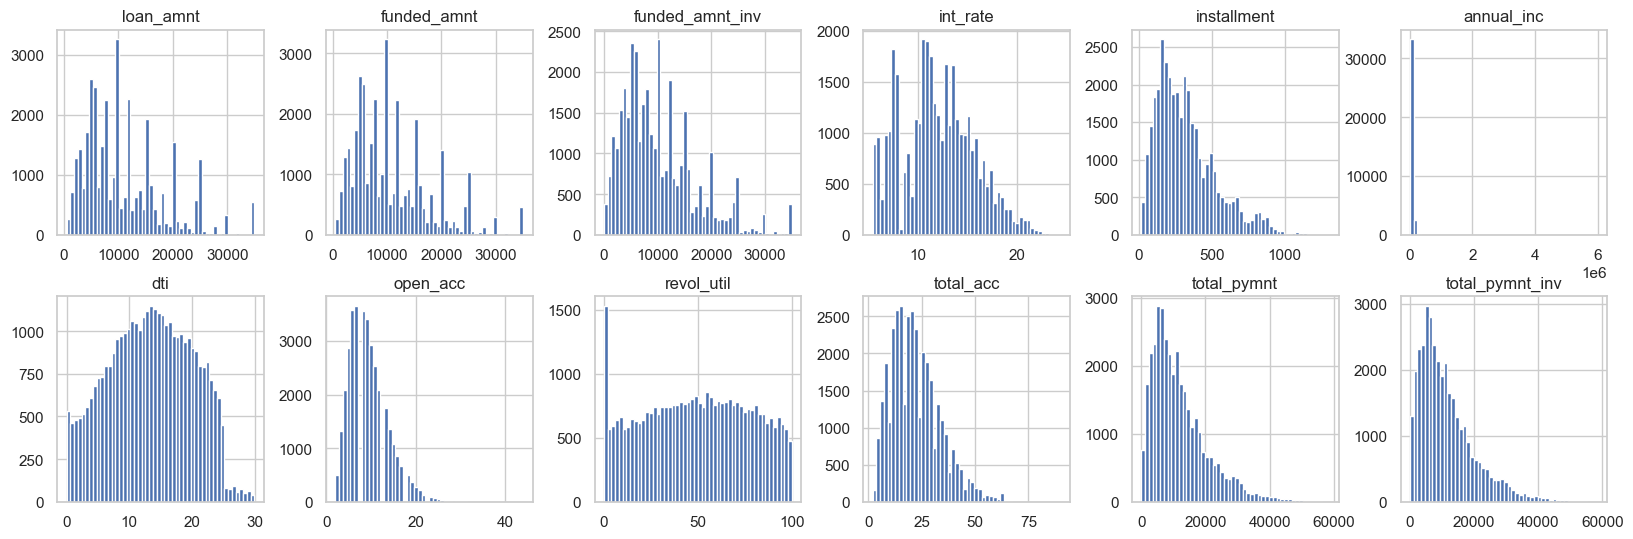

In [293]:
# plotting numerical data in a single plot
loan[num_cols].hist(bins=50,figsize=(20,20), color='#4C72B0', layout=(6,6));

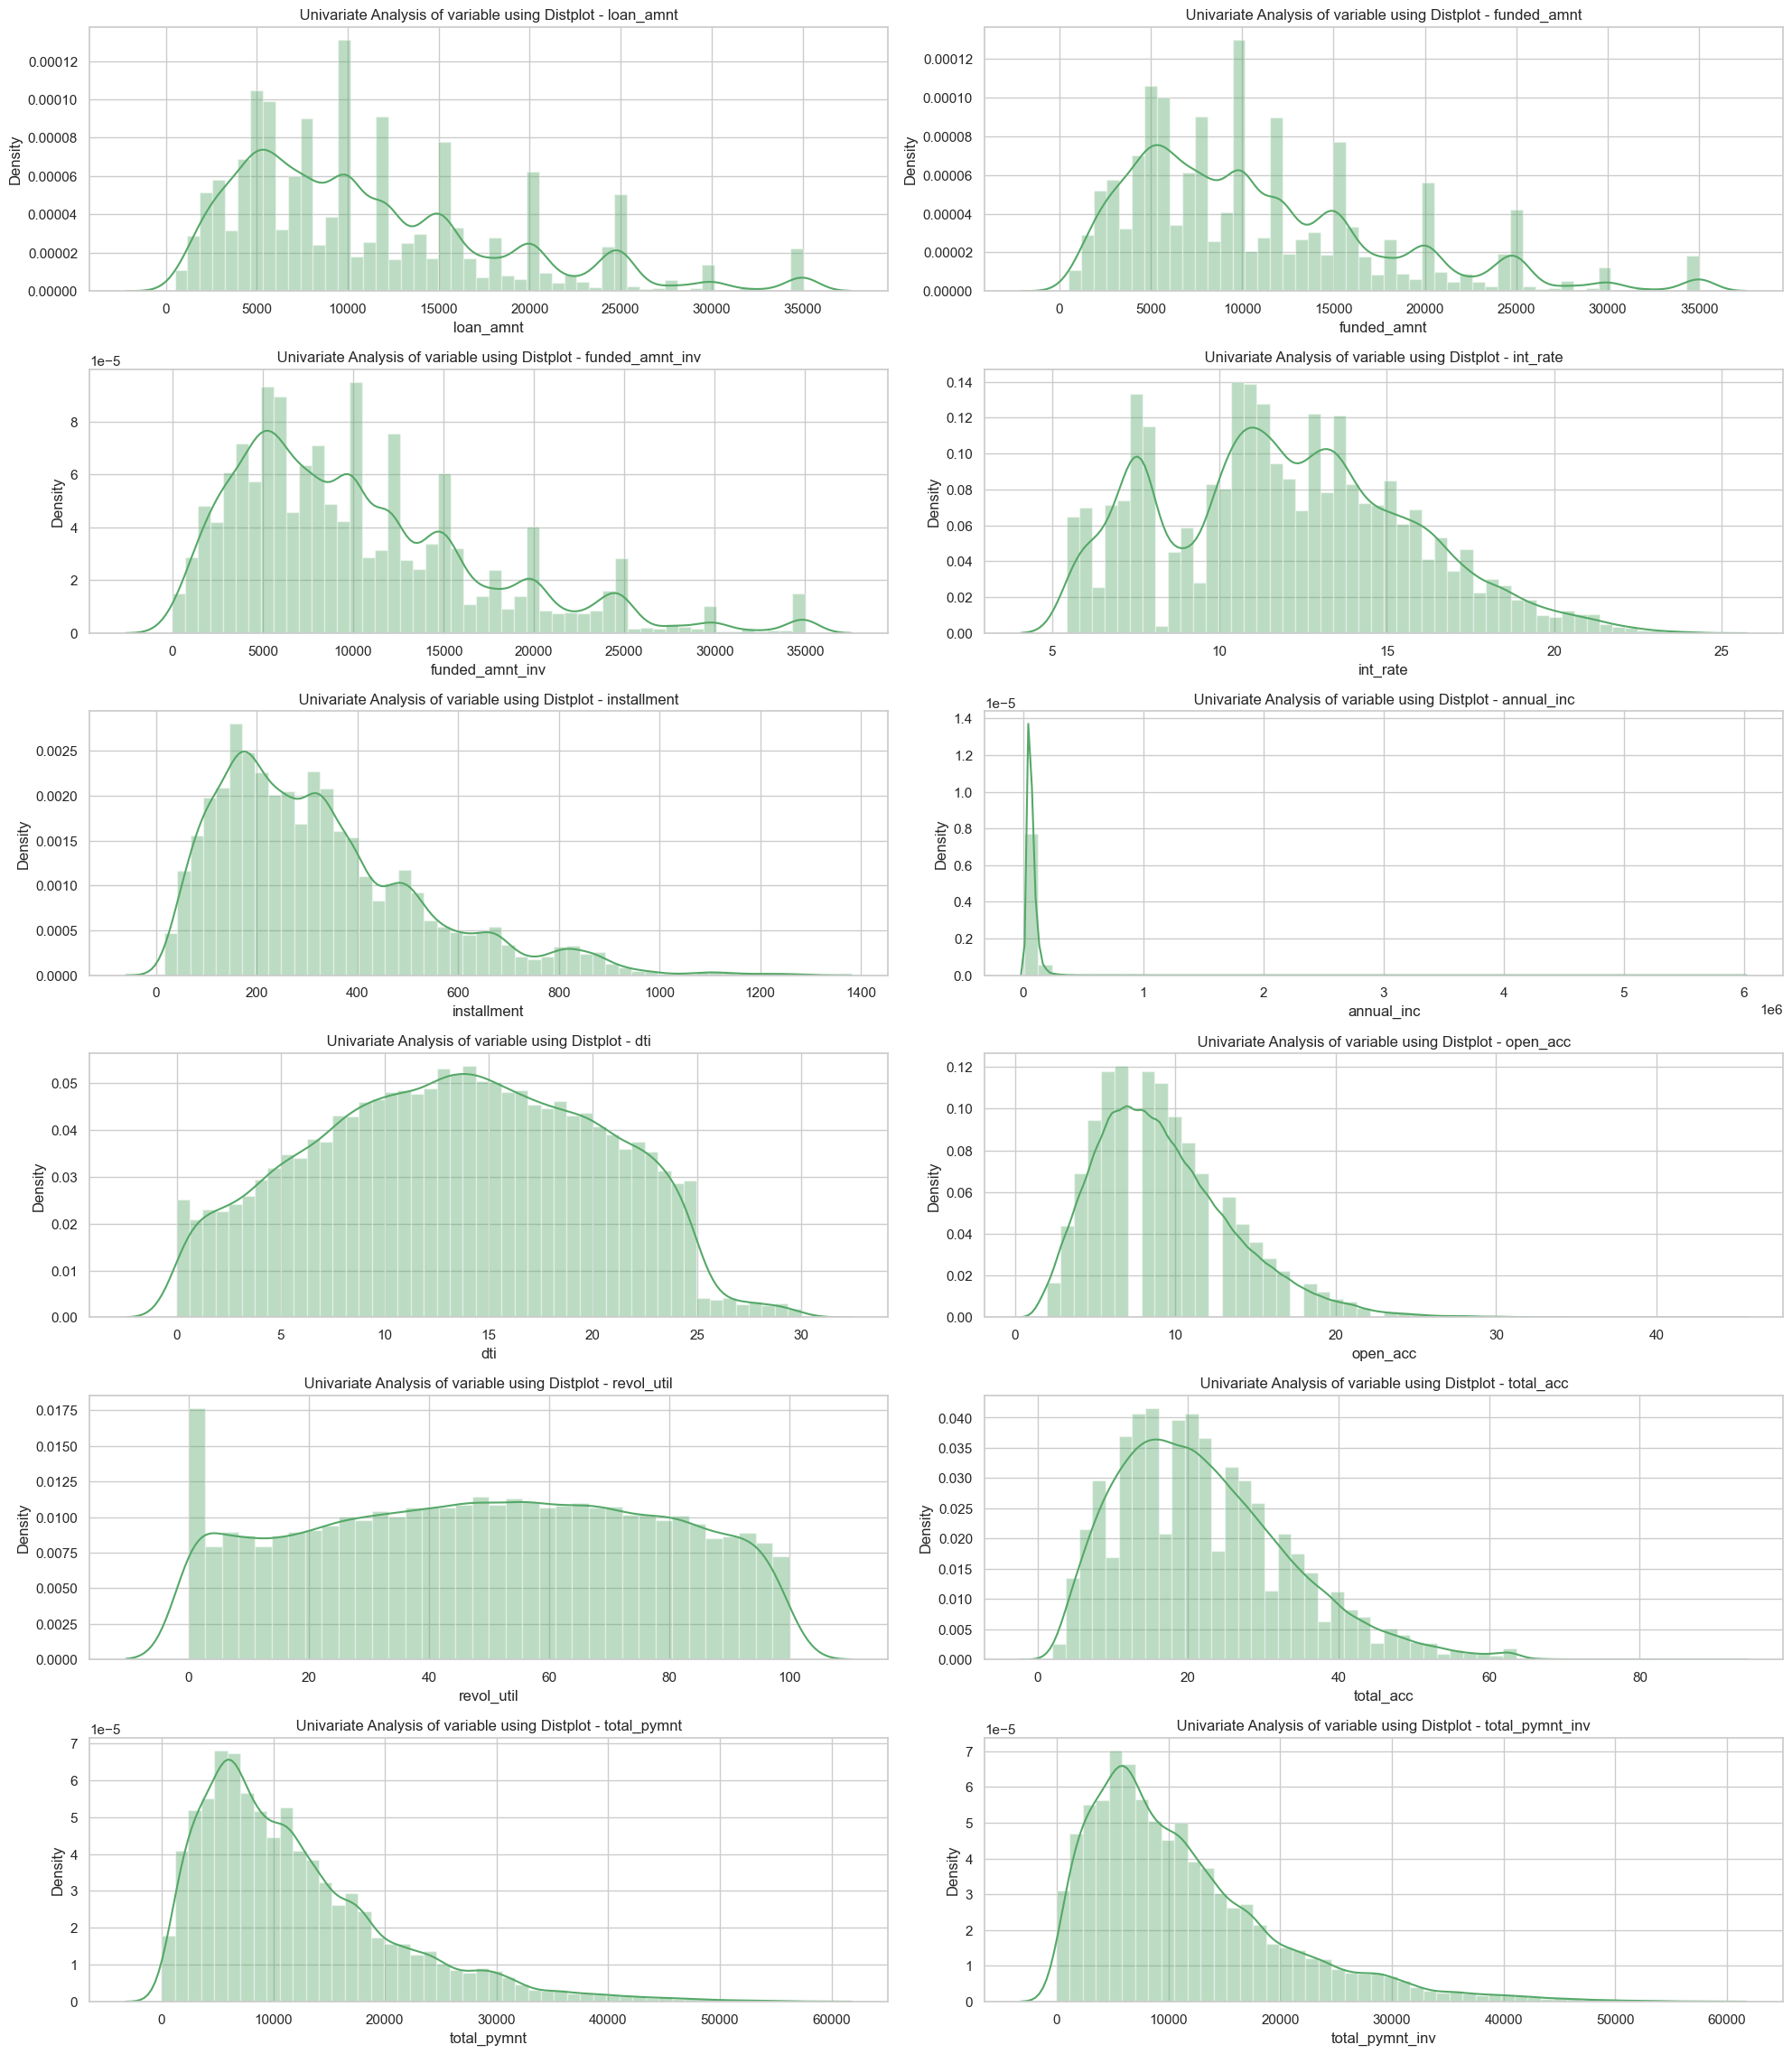

In [294]:
plt.figure(figsize=(20,30))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.distplot( loan[col] , color='#55A868' )
    plt.title( f' Univariate Analysis of variable using Distplot - {col} ' )
plt.tight_layout()
plt.show()

#### Observations - 
1. <b> Variable - loan_amnt </b> - Loan amounts are left skewed and generally in the range of 5000 - 10000 with spikes at every 5000 interval
2. <b> Variable - annual_inc </b> - Very Few people have very high annual income

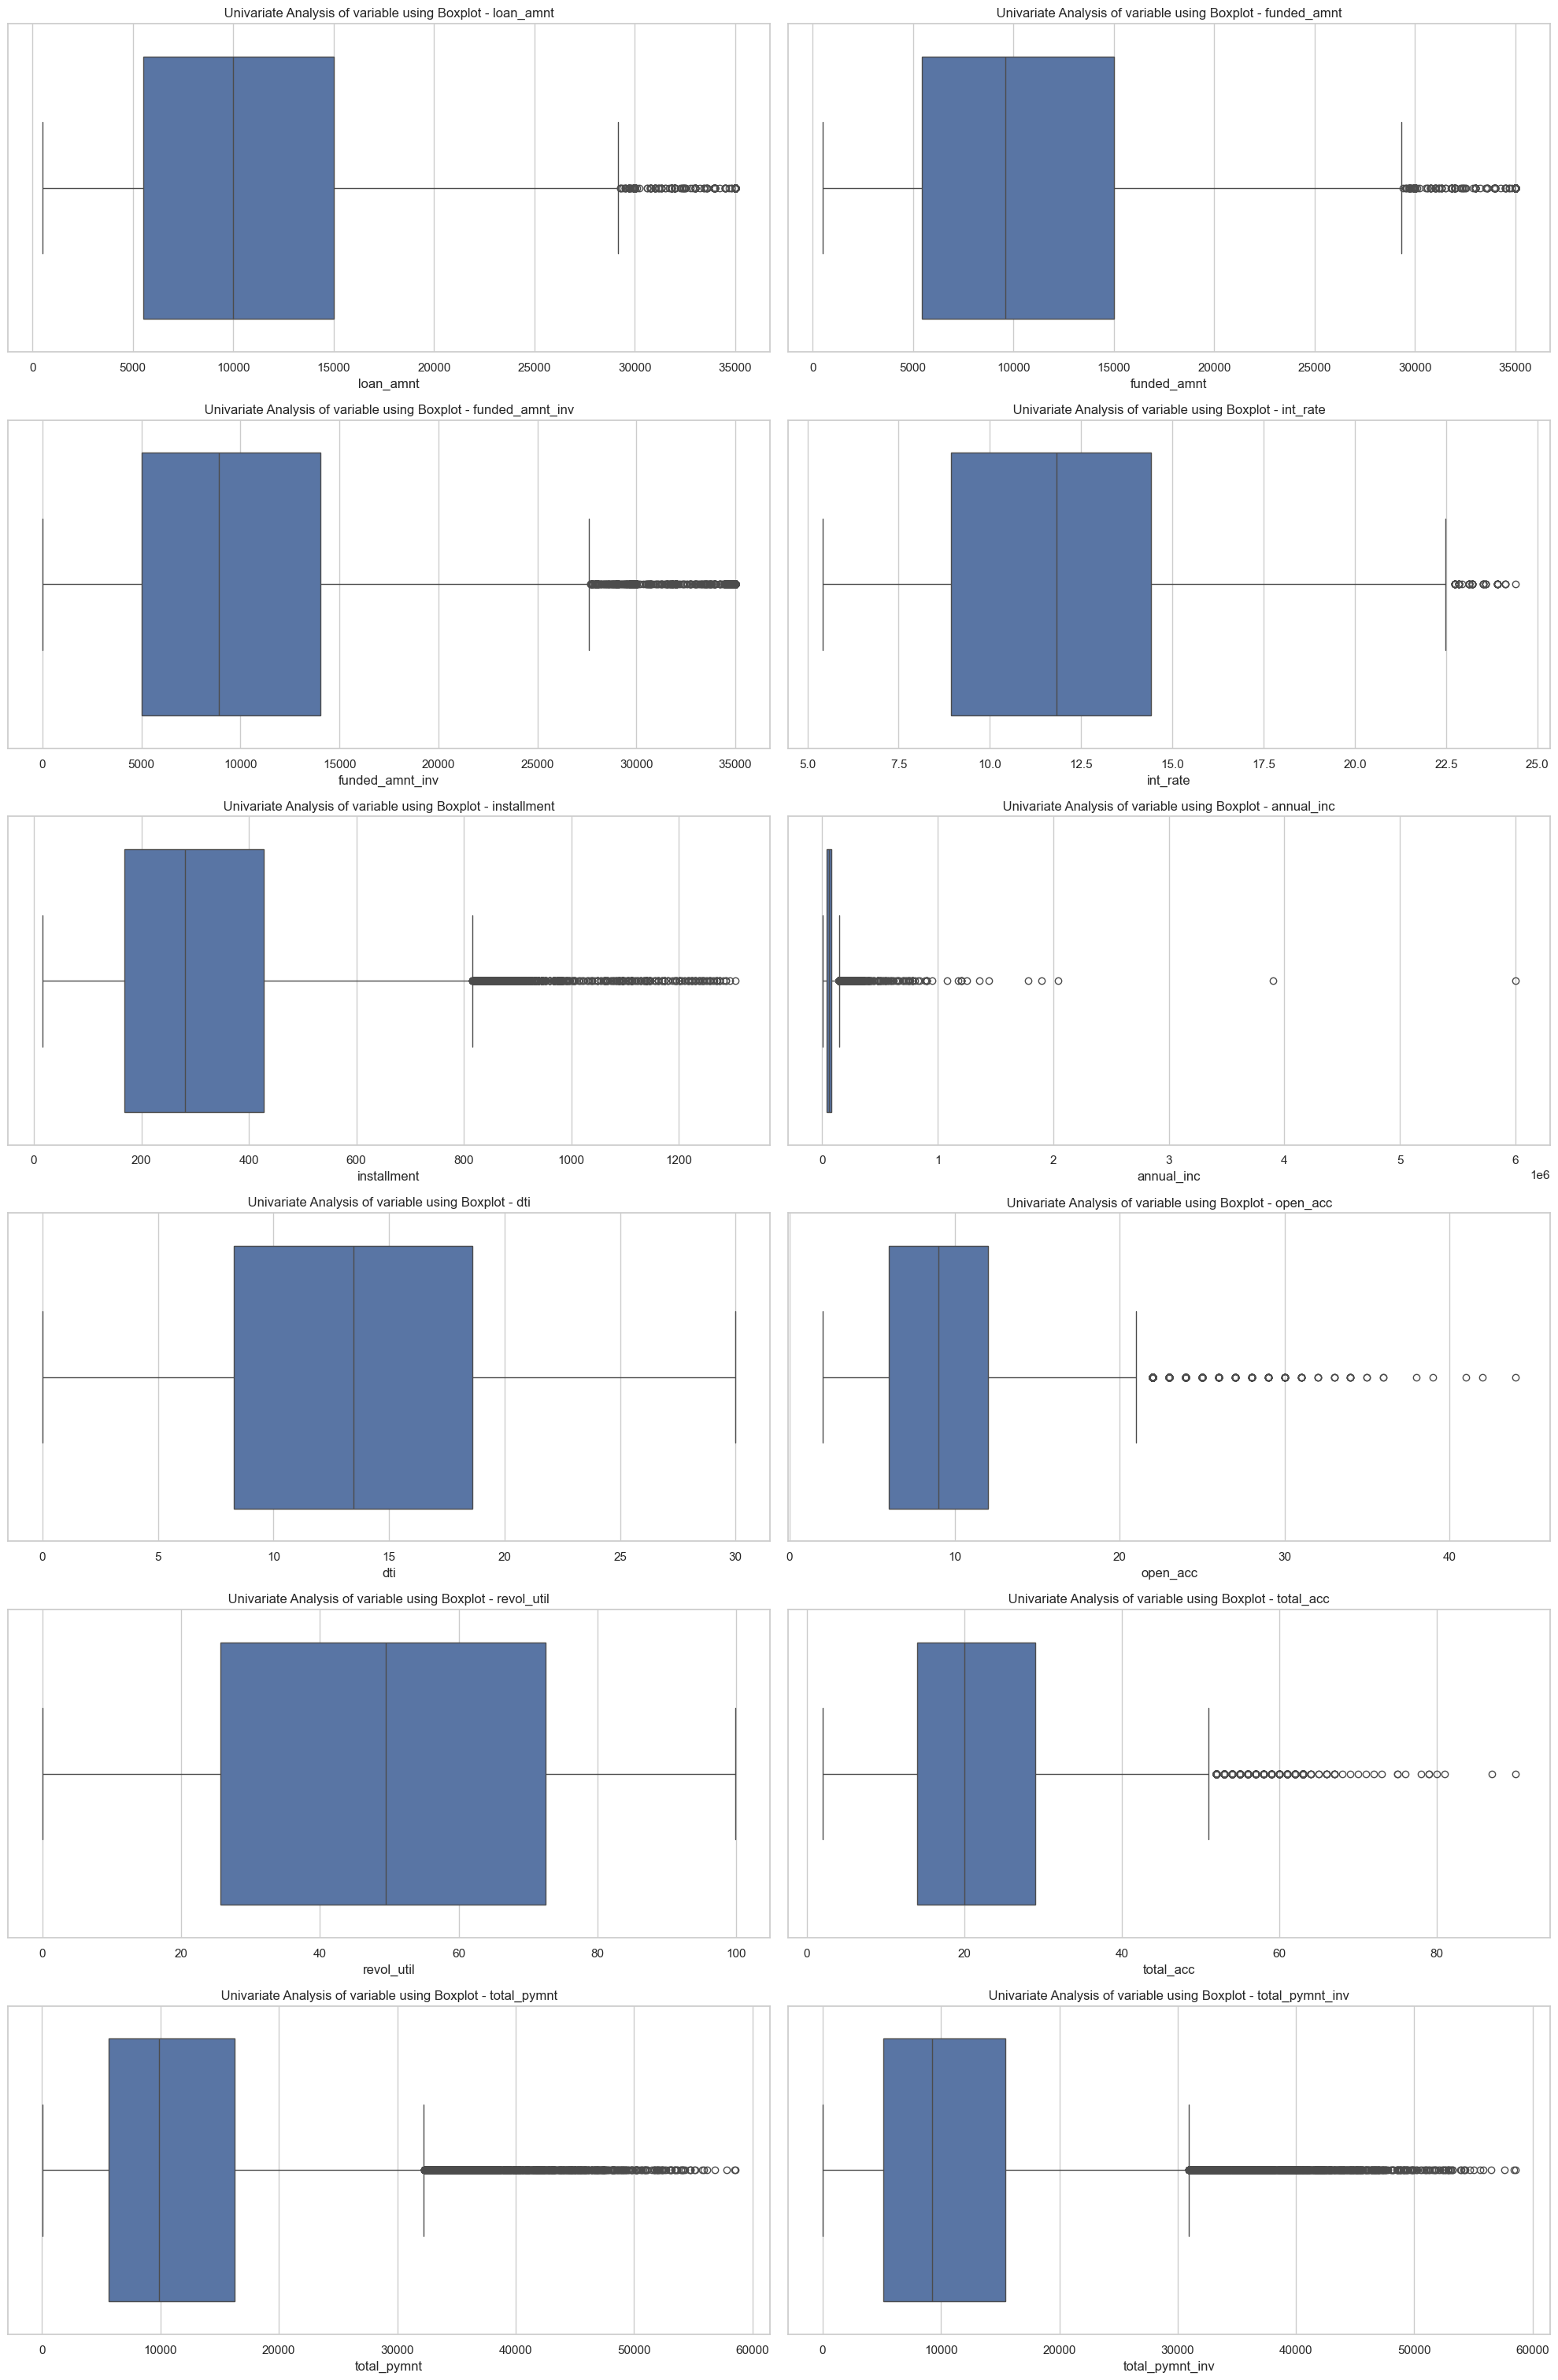

In [295]:
plt.figure(figsize=(20,40))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.boxplot( x=loan[col] , color='#4C72B0' )
    plt.title( f' Univariate Analysis of variable using Boxplot - {col} ' )
plt.tight_layout()
plt.show()

In [305]:
loan=loan_cleaned.copy()

### Outlier Teatment

#### Observations - 
1. <b> Variable - annual_inc </b> : Looks like the feature "annual_inc" has outliers in the upper fence. There is a huge jump of data in "annual_inc" and that can be trimmed.
2. <b> Variable - annual_inc </b> : The average interest rate is 12% but there is huge jump after 75 percentile.
3. <b> Variable - loan_amnt </b> : Most of the borrowers prefer to get loan amount between 5k to 15k.
4. <b> Variable - init_rate </b> : Almost of the borrowers gets interest rate between 9% to 14%.

In [318]:
for i in num_cols:
    print(f'Quartile info for variable {i} - ' , np.quantile( loan[i] , [0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1] ) )

Quartile info for variable loan_amnt -  [ 9825. 15000. 21000. 25000. 28000. 30000. 35000. 35000.]
Quartile info for variable funded_amnt -  [ 9600. 15000. 20000. 25000. 25975. 30000. 35000. 35000.]
Quartile info for variable funded_amnt_inv -  [ 8810.0633475 14000.        19975.        24369.412844  25000.
 29567.7428478 33936.75      35000.       ]
Quartile info for variable int_rate -  [11.71 14.27 16.77 18.25 19.29 19.91 20.89 24.4 ]
Quartile info for variable installment -  [ 278.97    423.105   612.374   741.1205  819.89    861.9834  916.7245
 1305.19  ]
Quartile info for variable annual_inc -  [ 58900.  80500. 110000. 132000. 150000. 163000. 185000. 230000.]
Quartile info for variable dti -  [13.49 18.62 22.34 23.83 24.52 24.85 26.51 29.99]
Quartile info for variable open_acc -  [ 9.   12.   15.   17.   18.   19.   20.47 22.  ]
Quartile info for variable revol_util -  [49.6   72.5   87.8   93.6   95.9   97.2   98.447 99.9  ]
Quartile info for variable total_acc -  [20. 29. 37. 43

##### Outlier Treatment for Variable - annual_inc

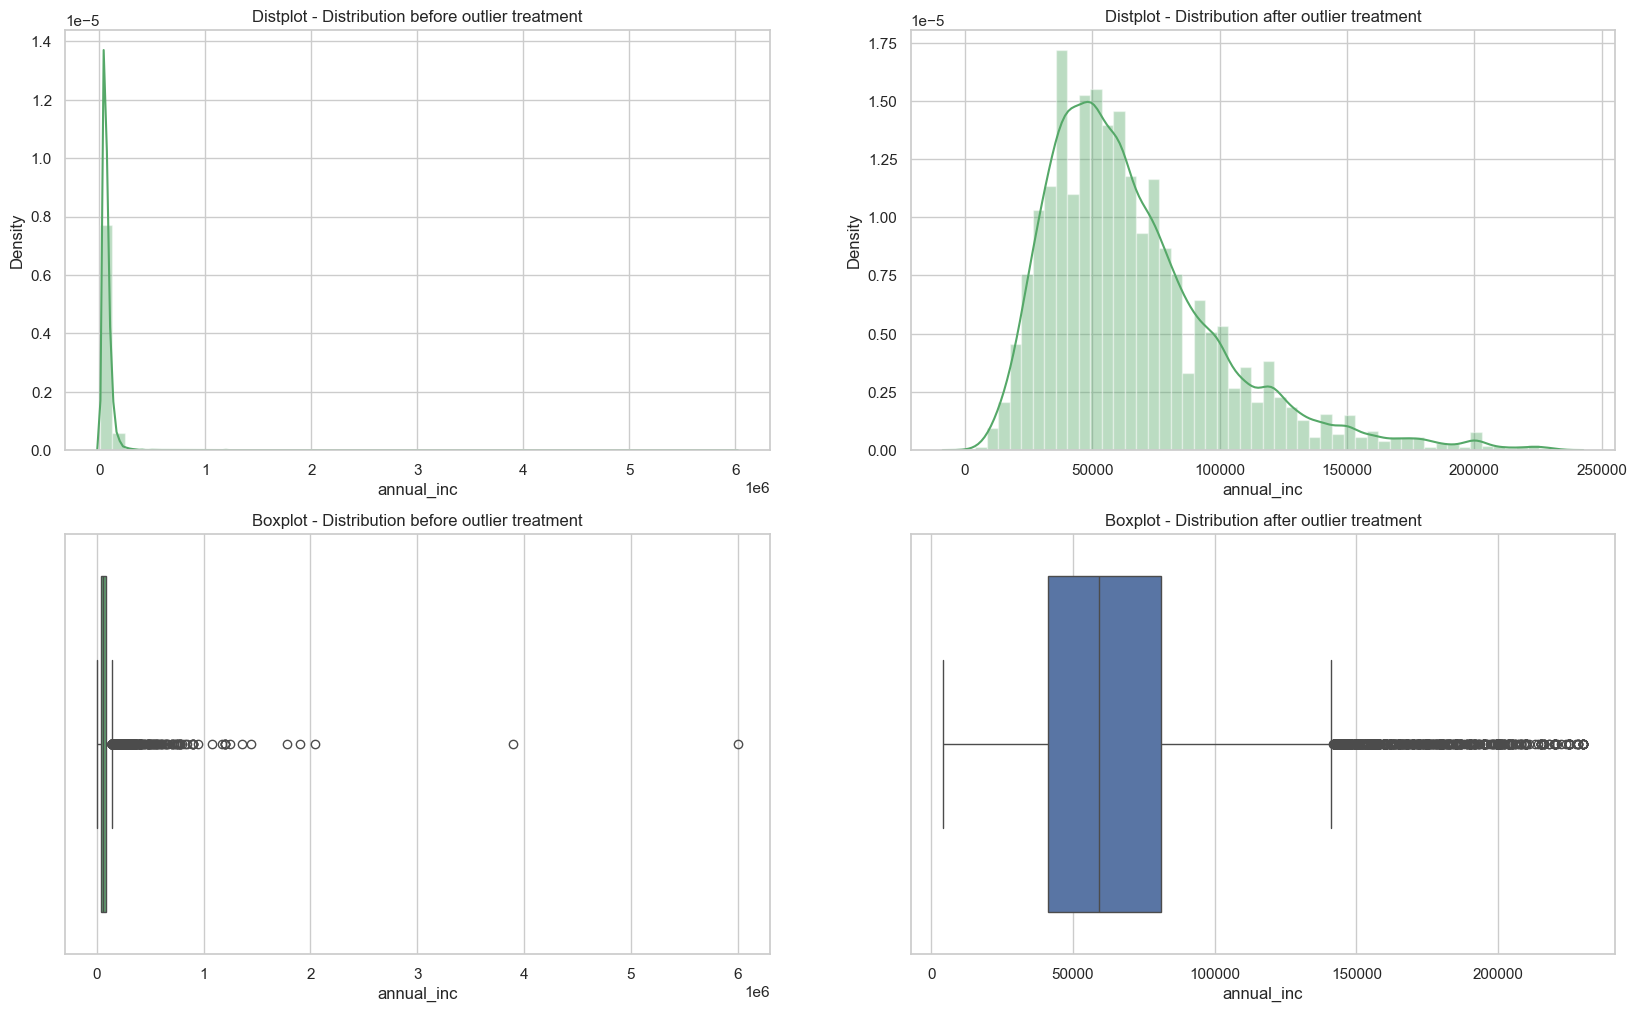

In [307]:
# Removing the data above 99% in upper fence of annual income

# Distribution plot before outlier removal
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.distplot(loan['annual_inc'], color='#55A868')
ax.set_title('Distplot - Distribution before outlier treatment')
plt.subplot(2,2,3)
ax = sns.boxplot(x=loan['annual_inc'], color='#4C72B0')
ax.set_title('Boxplot - Distribution before outlier treatment')

# Removing outliers
loan = loan[loan['annual_inc'] <= loan['annual_inc'].quantile(0.99)]

# Distribution plot after outlier removal
plt.subplot(2,2,2)
ax = sns.distplot(loan['annual_inc'], color='#55A868')
ax.set_title('Distplot - Distribution after outlier treatment')
plt.subplot(2,2,4)
ax = sns.boxplot(x=loan['annual_inc'], color='#4C72B0')
ax.set_title('Boxplot - Distribution after outlier treatment')
plt.show()

##### Outlier treatment for open_acc 

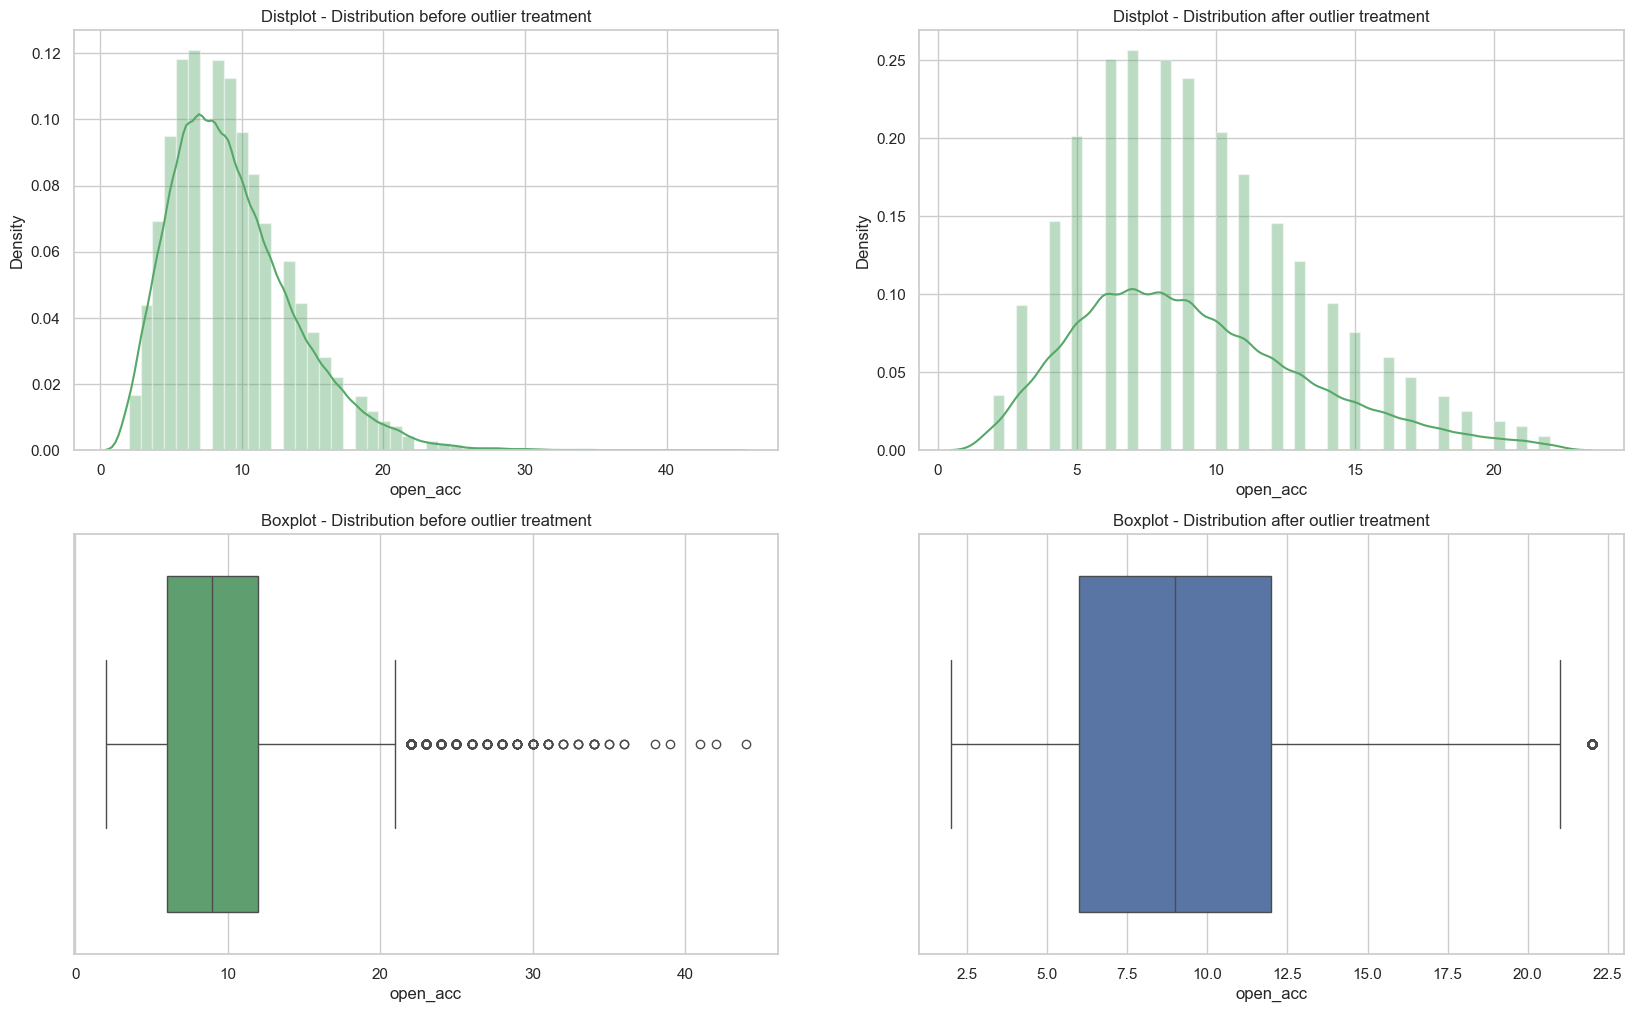

In [316]:
# Removing the data in upper fence of annual income

# Distribution plot before outlier removal
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.distplot(loan['open_acc'], color='#55A868')
ax.set_title('Distplot - Distribution before outlier treatment')
plt.subplot(2,2,3)
ax = sns.boxplot(x=loan['open_acc'], color='#4C72B0')
ax.set_title('Boxplot - Distribution before outlier treatment')

# Removing outliers
loan = loan[ loan['open_acc'] <= loan['open_acc'].quantile(0.99) ]

# Distribution plot after outlier removal
plt.subplot(2,2,2)
ax = sns.distplot(loan['open_acc'], color='#55A868')
ax.set_title('Distplot - Distribution after outlier treatment')
plt.subplot(2,2,4)
ax = sns.boxplot(x=loan['open_acc'], color='#4C72B0')
ax.set_title('Boxplot - Distribution after outlier treatment')
plt.show()

In [310]:
def remove_upperoutliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame to remove outliers
    df_filtered = df[ (df[column] >= lower_bound) & (df[column] <= upper_bound) ]
    return df_filtered

##### Outlier treatment for total_acc 

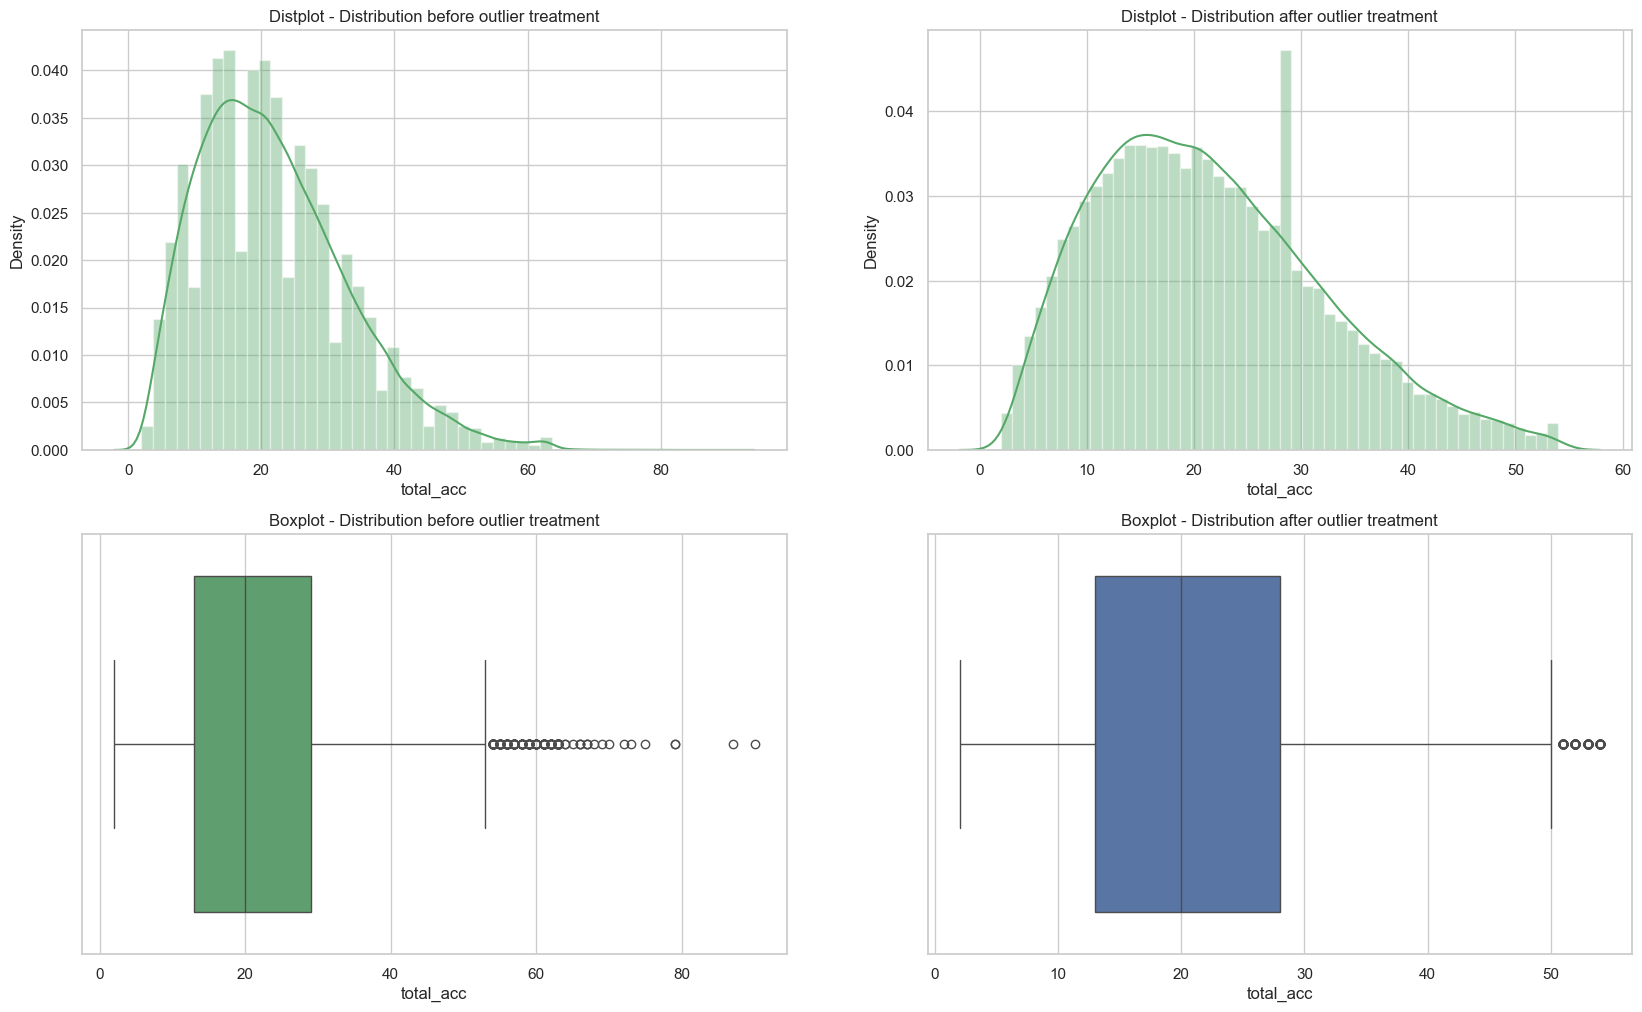

In [320]:
# Removing the data in upper fence of annual income

# Distribution plot before outlier removal
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.distplot(loan['total_acc'], color='#55A868')
ax.set_title('Distplot - Distribution before outlier treatment')
plt.subplot(2,2,3)
ax = sns.boxplot(x=loan['total_acc'], color='#4C72B0')
ax.set_title('Boxplot - Distribution before outlier treatment')

# Removing outliers
loan = loan[ loan['total_acc'] <= loan['total_acc'].quantile(0.99) ]

# Distribution plot after outlier removal
plt.subplot(2,2,2)
ax = sns.distplot(loan['total_acc'], color='#55A868')
ax.set_title('Distplot - Distribution after outlier treatment')
plt.subplot(2,2,4)
ax = sns.boxplot(x=loan['total_acc'], color='#4C72B0')
ax.set_title('Boxplot - Distribution after outlier treatment')
plt.show()

In [323]:
for i in num_cols:
    print(f'Quartile info for variable {i} - ' , np.quantile( loan[i] , [0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1] ) )

Quartile info for variable loan_amnt -  [ 9800. 15000. 21000. 25000. 28000. 30000. 35000. 35000.]
Quartile info for variable funded_amnt -  [ 9600. 15000. 20000. 25000. 25975. 30000. 35000. 35000.]
Quartile info for variable funded_amnt_inv -  [ 8775.        14000.        19975.        24342.877358  25000.
 29524.        33923.4256142 35000.       ]
Quartile info for variable int_rate -  [11.71 14.27 16.77 18.25 19.29 19.91 20.89 24.4 ]
Quartile info for variable installment -  [ 278.47   421.74   610.136  737.925  819.89   862.36   916.819 1305.19 ]
Quartile info for variable annual_inc -  [ 58000.    80000.   110000.   132000.   150000.   161480.   184997.92
 230000.  ]
Quartile info for variable dti -  [13.46   18.59   22.34   23.82   24.51   24.8448 26.47   29.99  ]
Quartile info for variable open_acc -  [ 9. 12. 15. 17. 18. 19. 20. 22.]
Quartile info for variable revol_util -  [49.7 72.6 87.9 93.6 95.9 97.2 98.5 99.9]
Quartile info for variable total_acc -  [20. 28. 36. 41. 44. 47

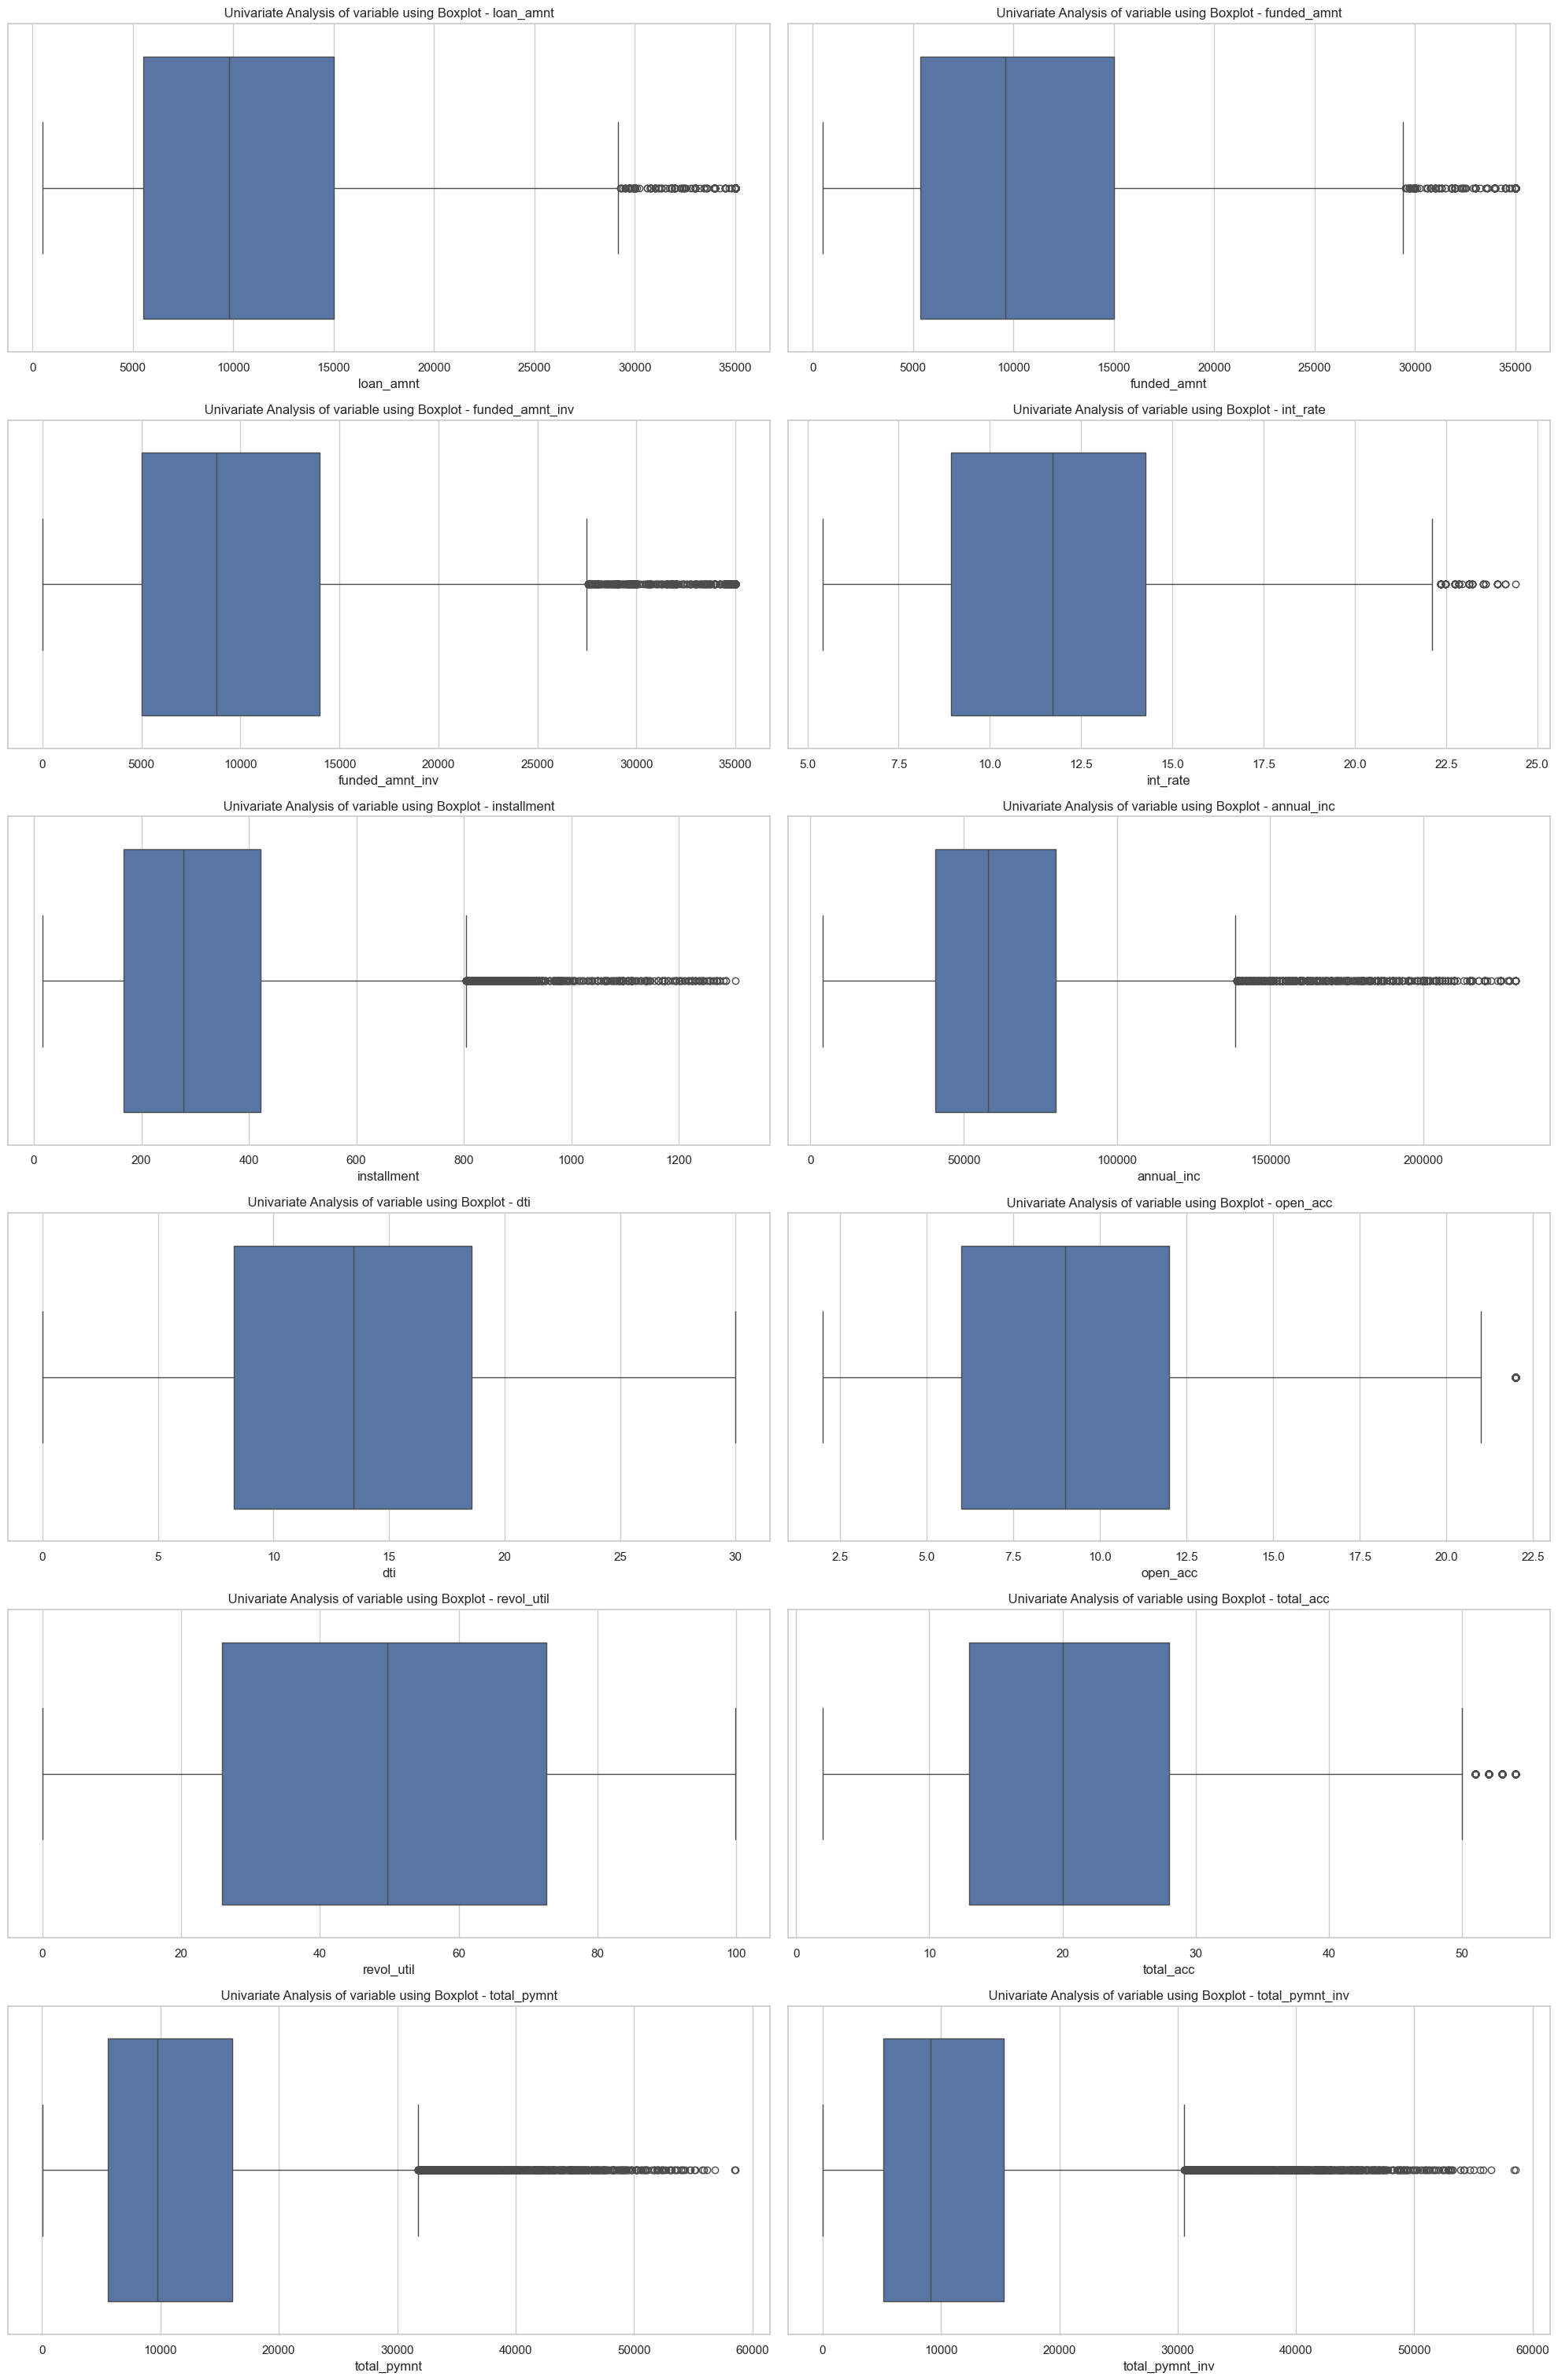

In [324]:
plt.figure(figsize=(20,40))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.boxplot( x=loan[col] , color='#4C72B0' )
    plt.title( f' Univariate Analysis of variable using Boxplot - {col} ' )
plt.tight_layout()
plt.show()

#### Decision -
For some variables , though there are some values far from distributions, the distributions look pretty continous and so we have decided not to perform any further outlier treatments to remove the extreme values for these above columns.

### Categorical Columns

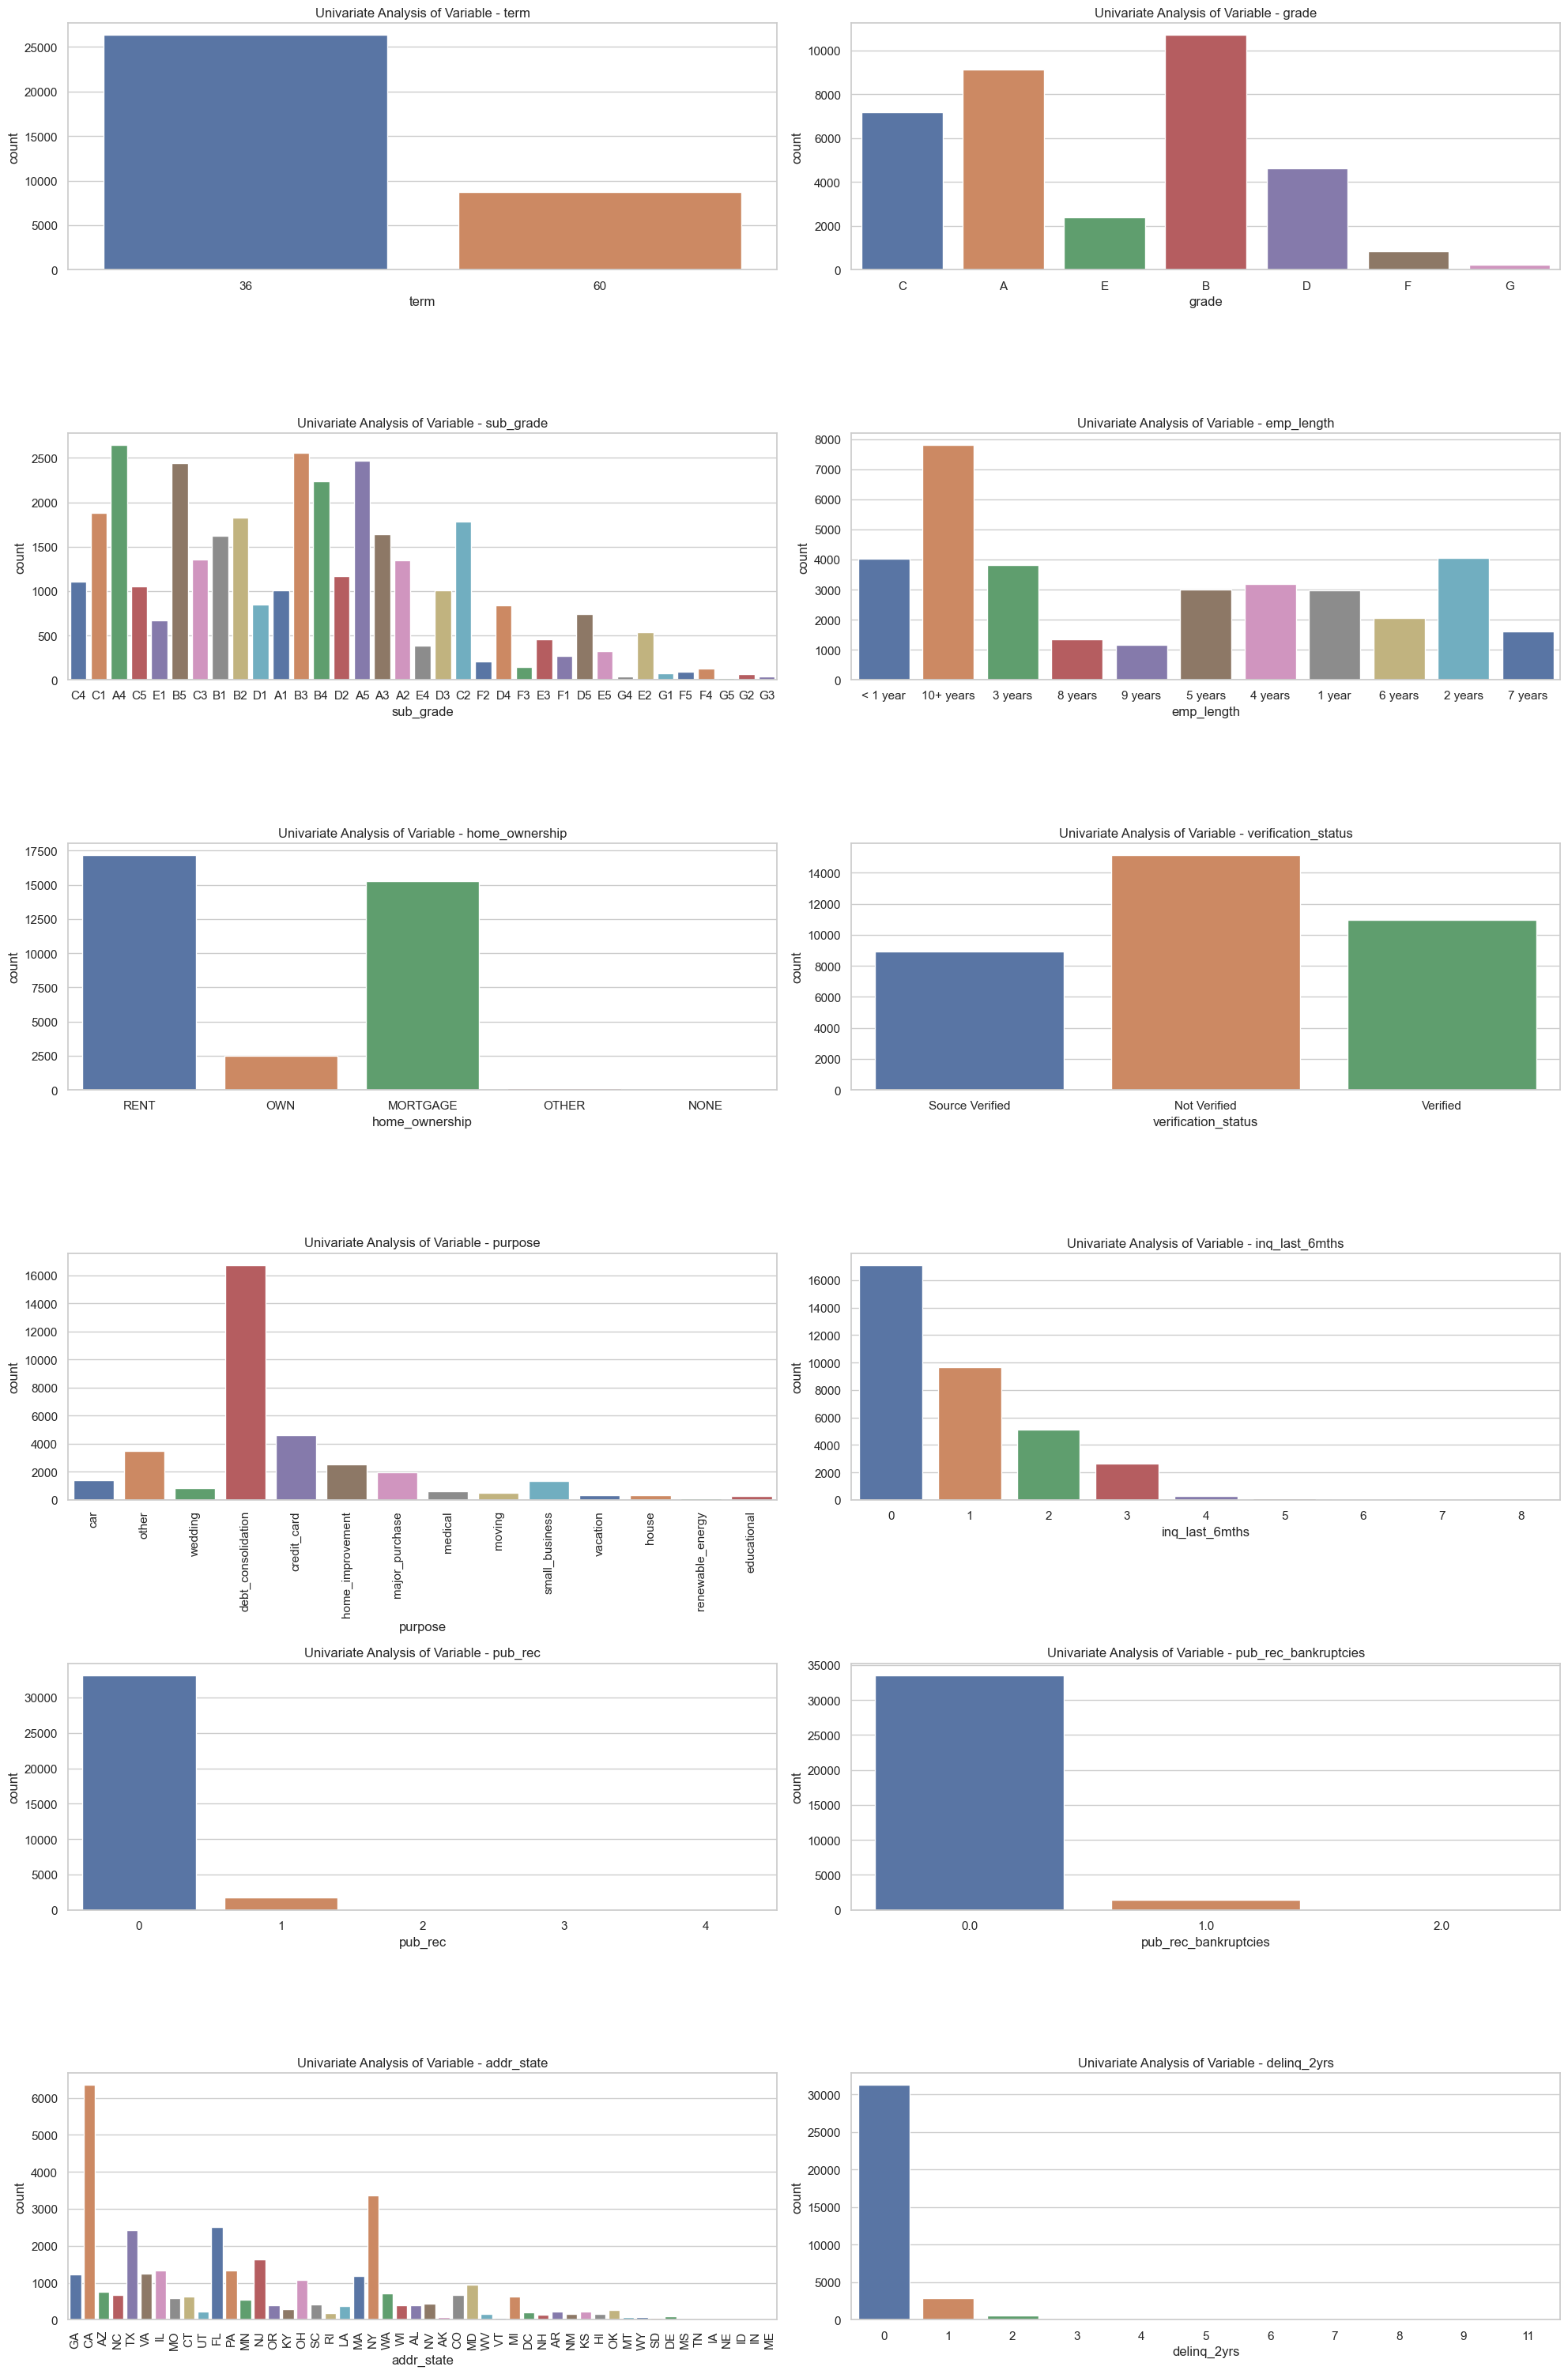

In [325]:
plt.figure(figsize=(20,40))
for ax , col in enumerate(cat_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.countplot( x=loan[col] , palette='deep' )
    plt.title( f'Univariate Analysis of Variable - {col}' )
    if col in ('purpose','addr_state') :
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Observations - 
1. <b> Variable - grade </b> - We can see that most of the loans are high graded loans and thus not too prone to suffer default.
2. <b> Variable - emp_length </b> - From the above plot it can be seen that most employees for whom loans have been lent out are of 10+ years of experience
3. <b> Variable - purpose </b> - The majority of the loans issued are for debt_consolidation
4. <b> Variable - term </b> - More loans issued are for 36 months compared to other terms.

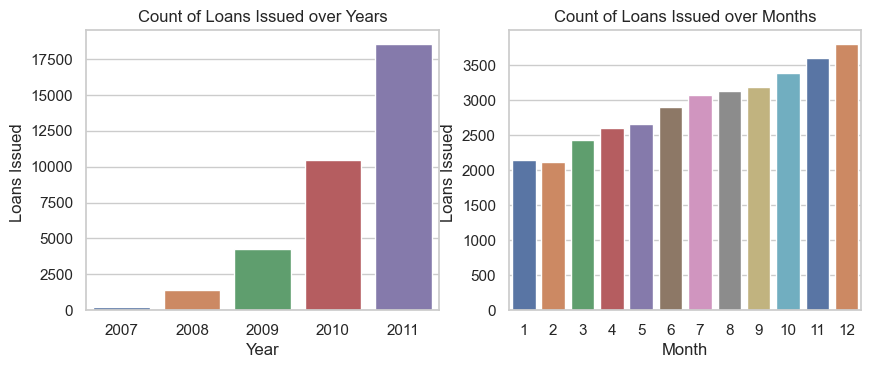

In [358]:
## Plot of issue year with loan status
plt.figure(figsize=[10,8])
plt.subplot(2,2,1)
ax1=sns.countplot(data=loan ,x='issue_d_year' , palette='deep' )
ax1.set_title('Count of Loans Issued over Years')
plt.xlabel('Year')
plt.ylabel('Loans Issued ')
# over month
plt.subplot(2,2,2)
ax1=sns.countplot(data=loan ,x='issue_d_month' , palette='deep' )
ax1.set_title('Count of Loans Issued over Months')
plt.xlabel('Month')
plt.ylabel('Loans Issued ')
plt.show()

#### Observations-
1. <b> Variables - issue_d_year </b> :There is a clear increasing trend in the number of loans issued over the years, with a significant rise from 2009 to 2011.
2. <b> Variables -  issue_d_month </b> :There is a clear increasing trend in the number of loans issued over the months, with a significant rise from Jan to Dec.

## Bivariate Analysis

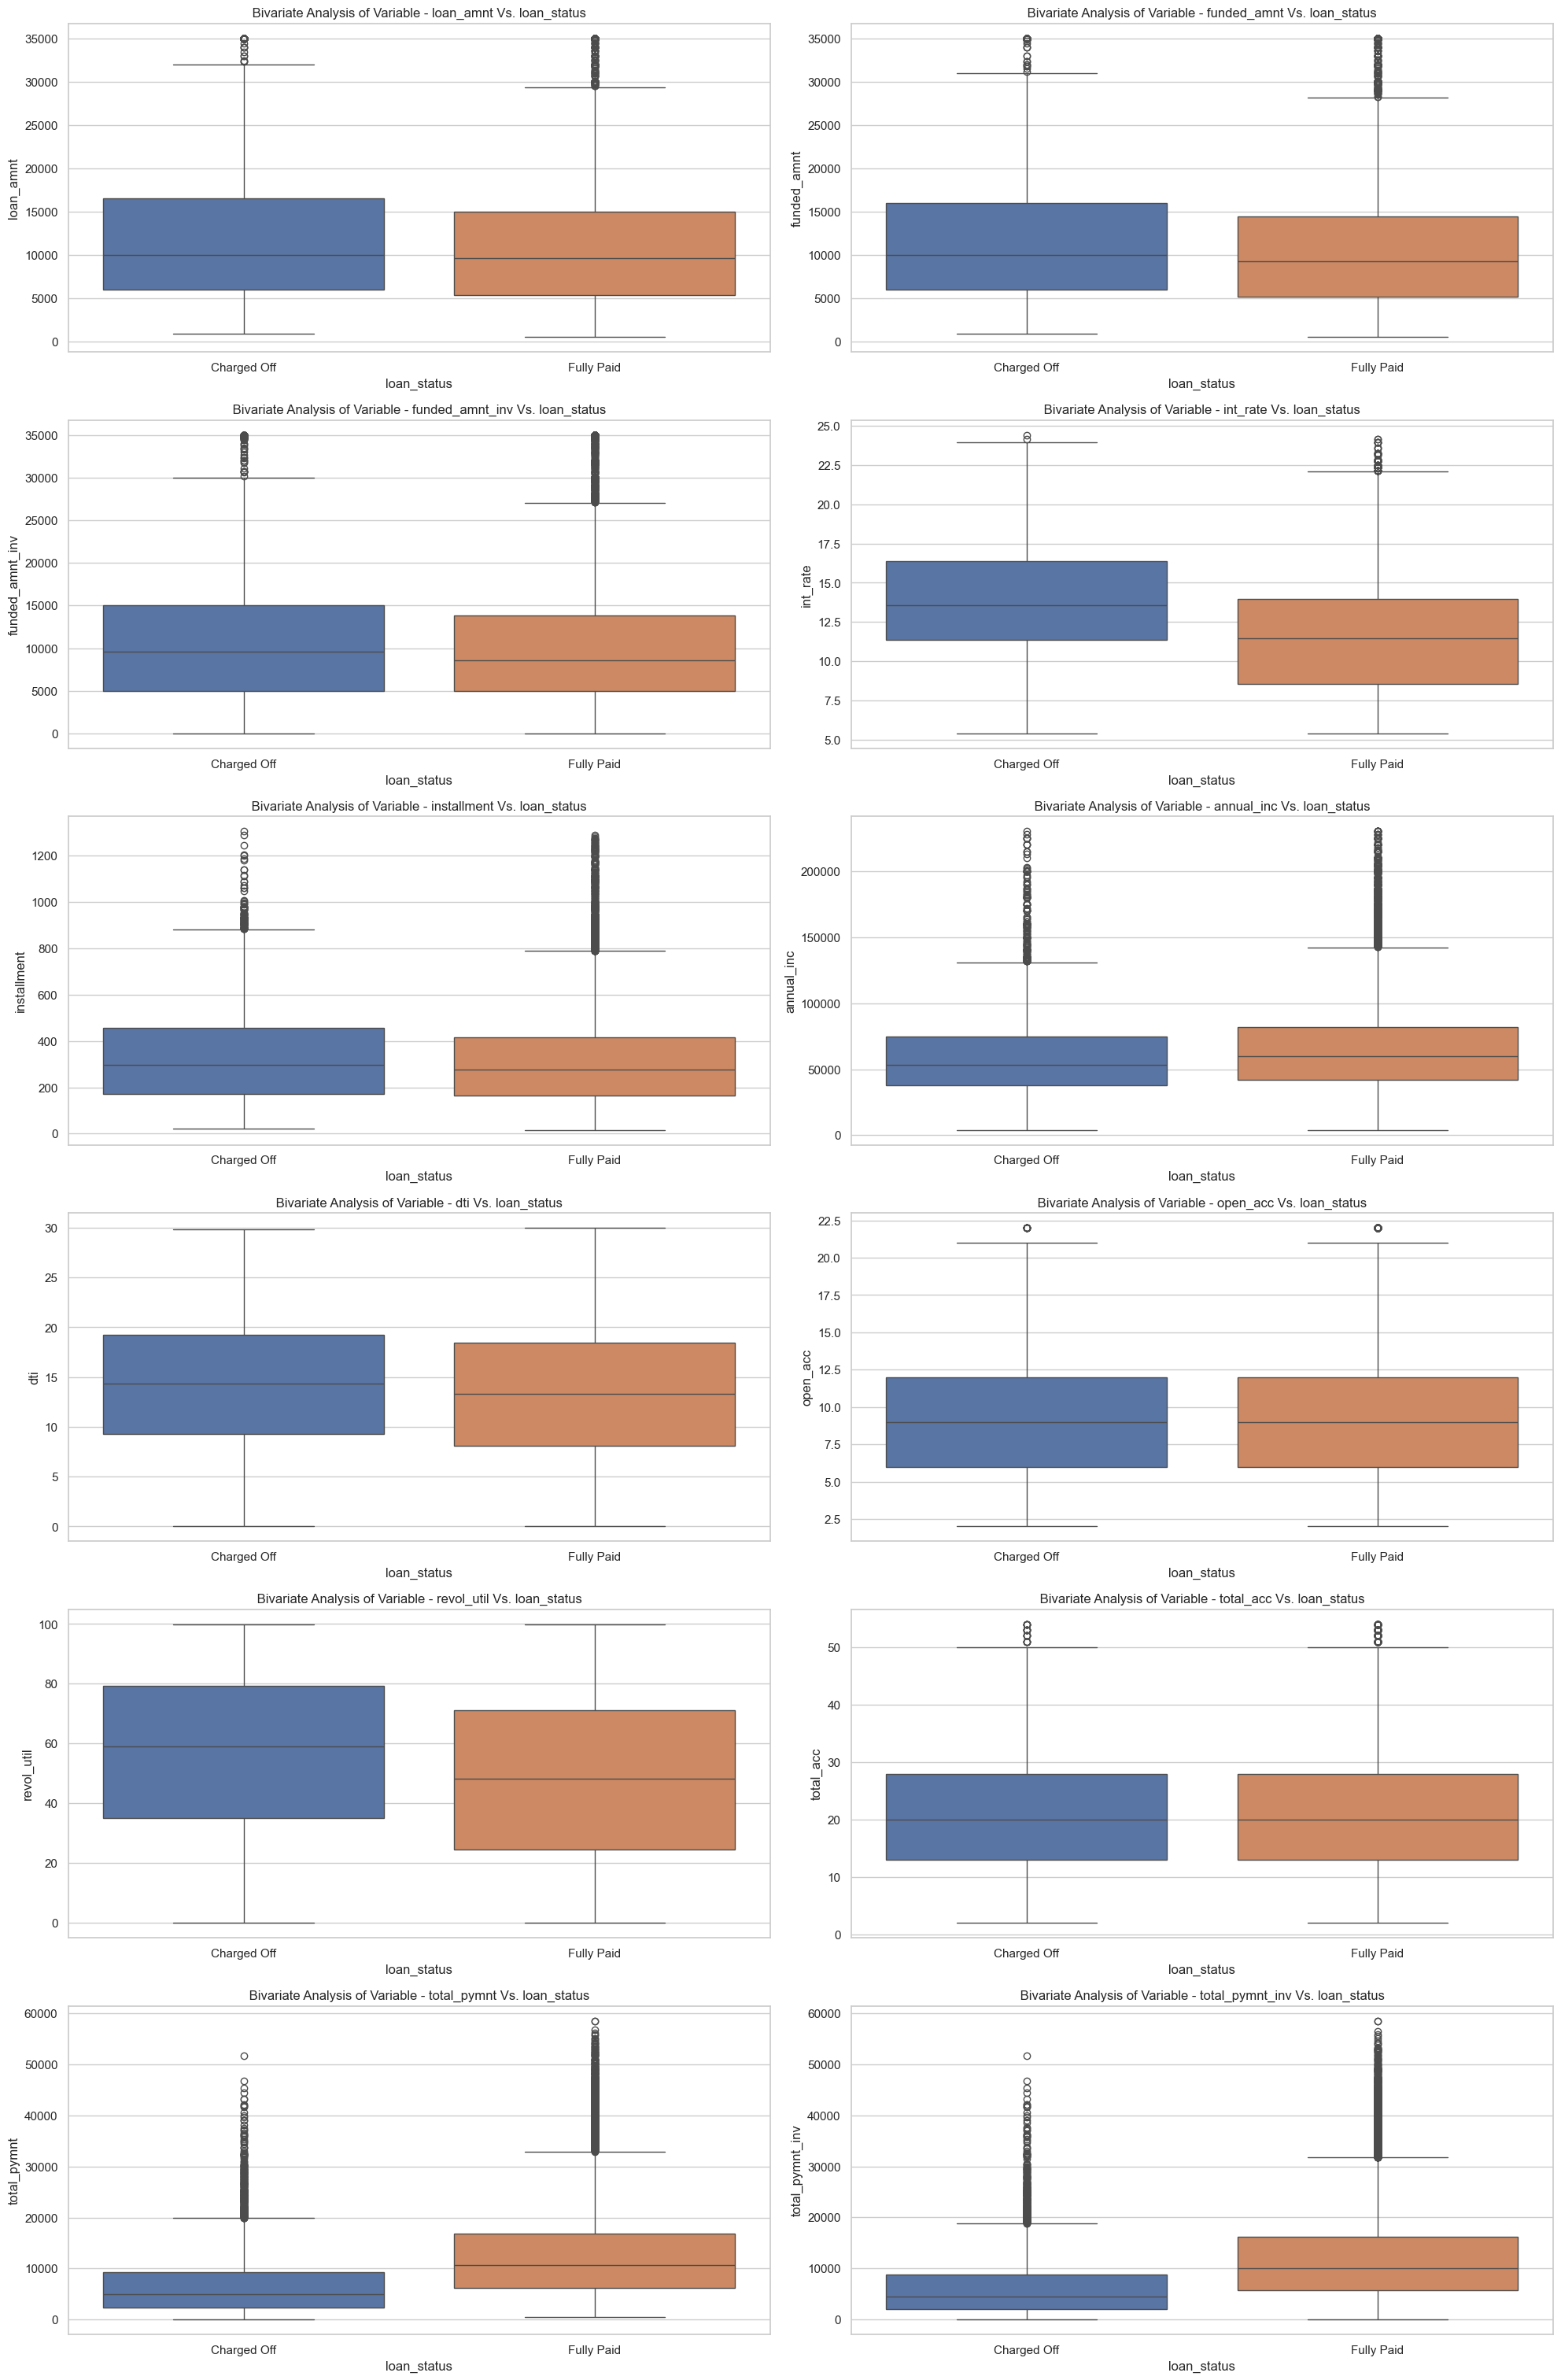

In [326]:
# Numerical Vs Categorical
plt.figure(figsize=(20,40))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.boxplot(x=loan["loan_status"] , y=loan[col] , palette='deep')
    plt.title( f' Bivariate Analysis of Variable - {col} Vs. loan_status ' )
plt.tight_layout()
plt.show()

#### Observations - 
1. <b> Variable - loan_amnt </b> - Almost identical 25% and mean for both loan_status (Charged Off and Fully Paid)
2. <b> Variable - init_rate<b> - Loans with higher interest rates are more likely to default or be charged off. There is a indication of negative correlation between init_rate and loan_status. We'll check this at later point of time.
3. <b> Variable - installment </b> - Almost identical 25% and mean for both loan_status (Charged Off and Fully Paid)
4. <b> Variable - dti </b> - Members with slight high dti are more likely to default or be charged off,  although the differences are minimal.

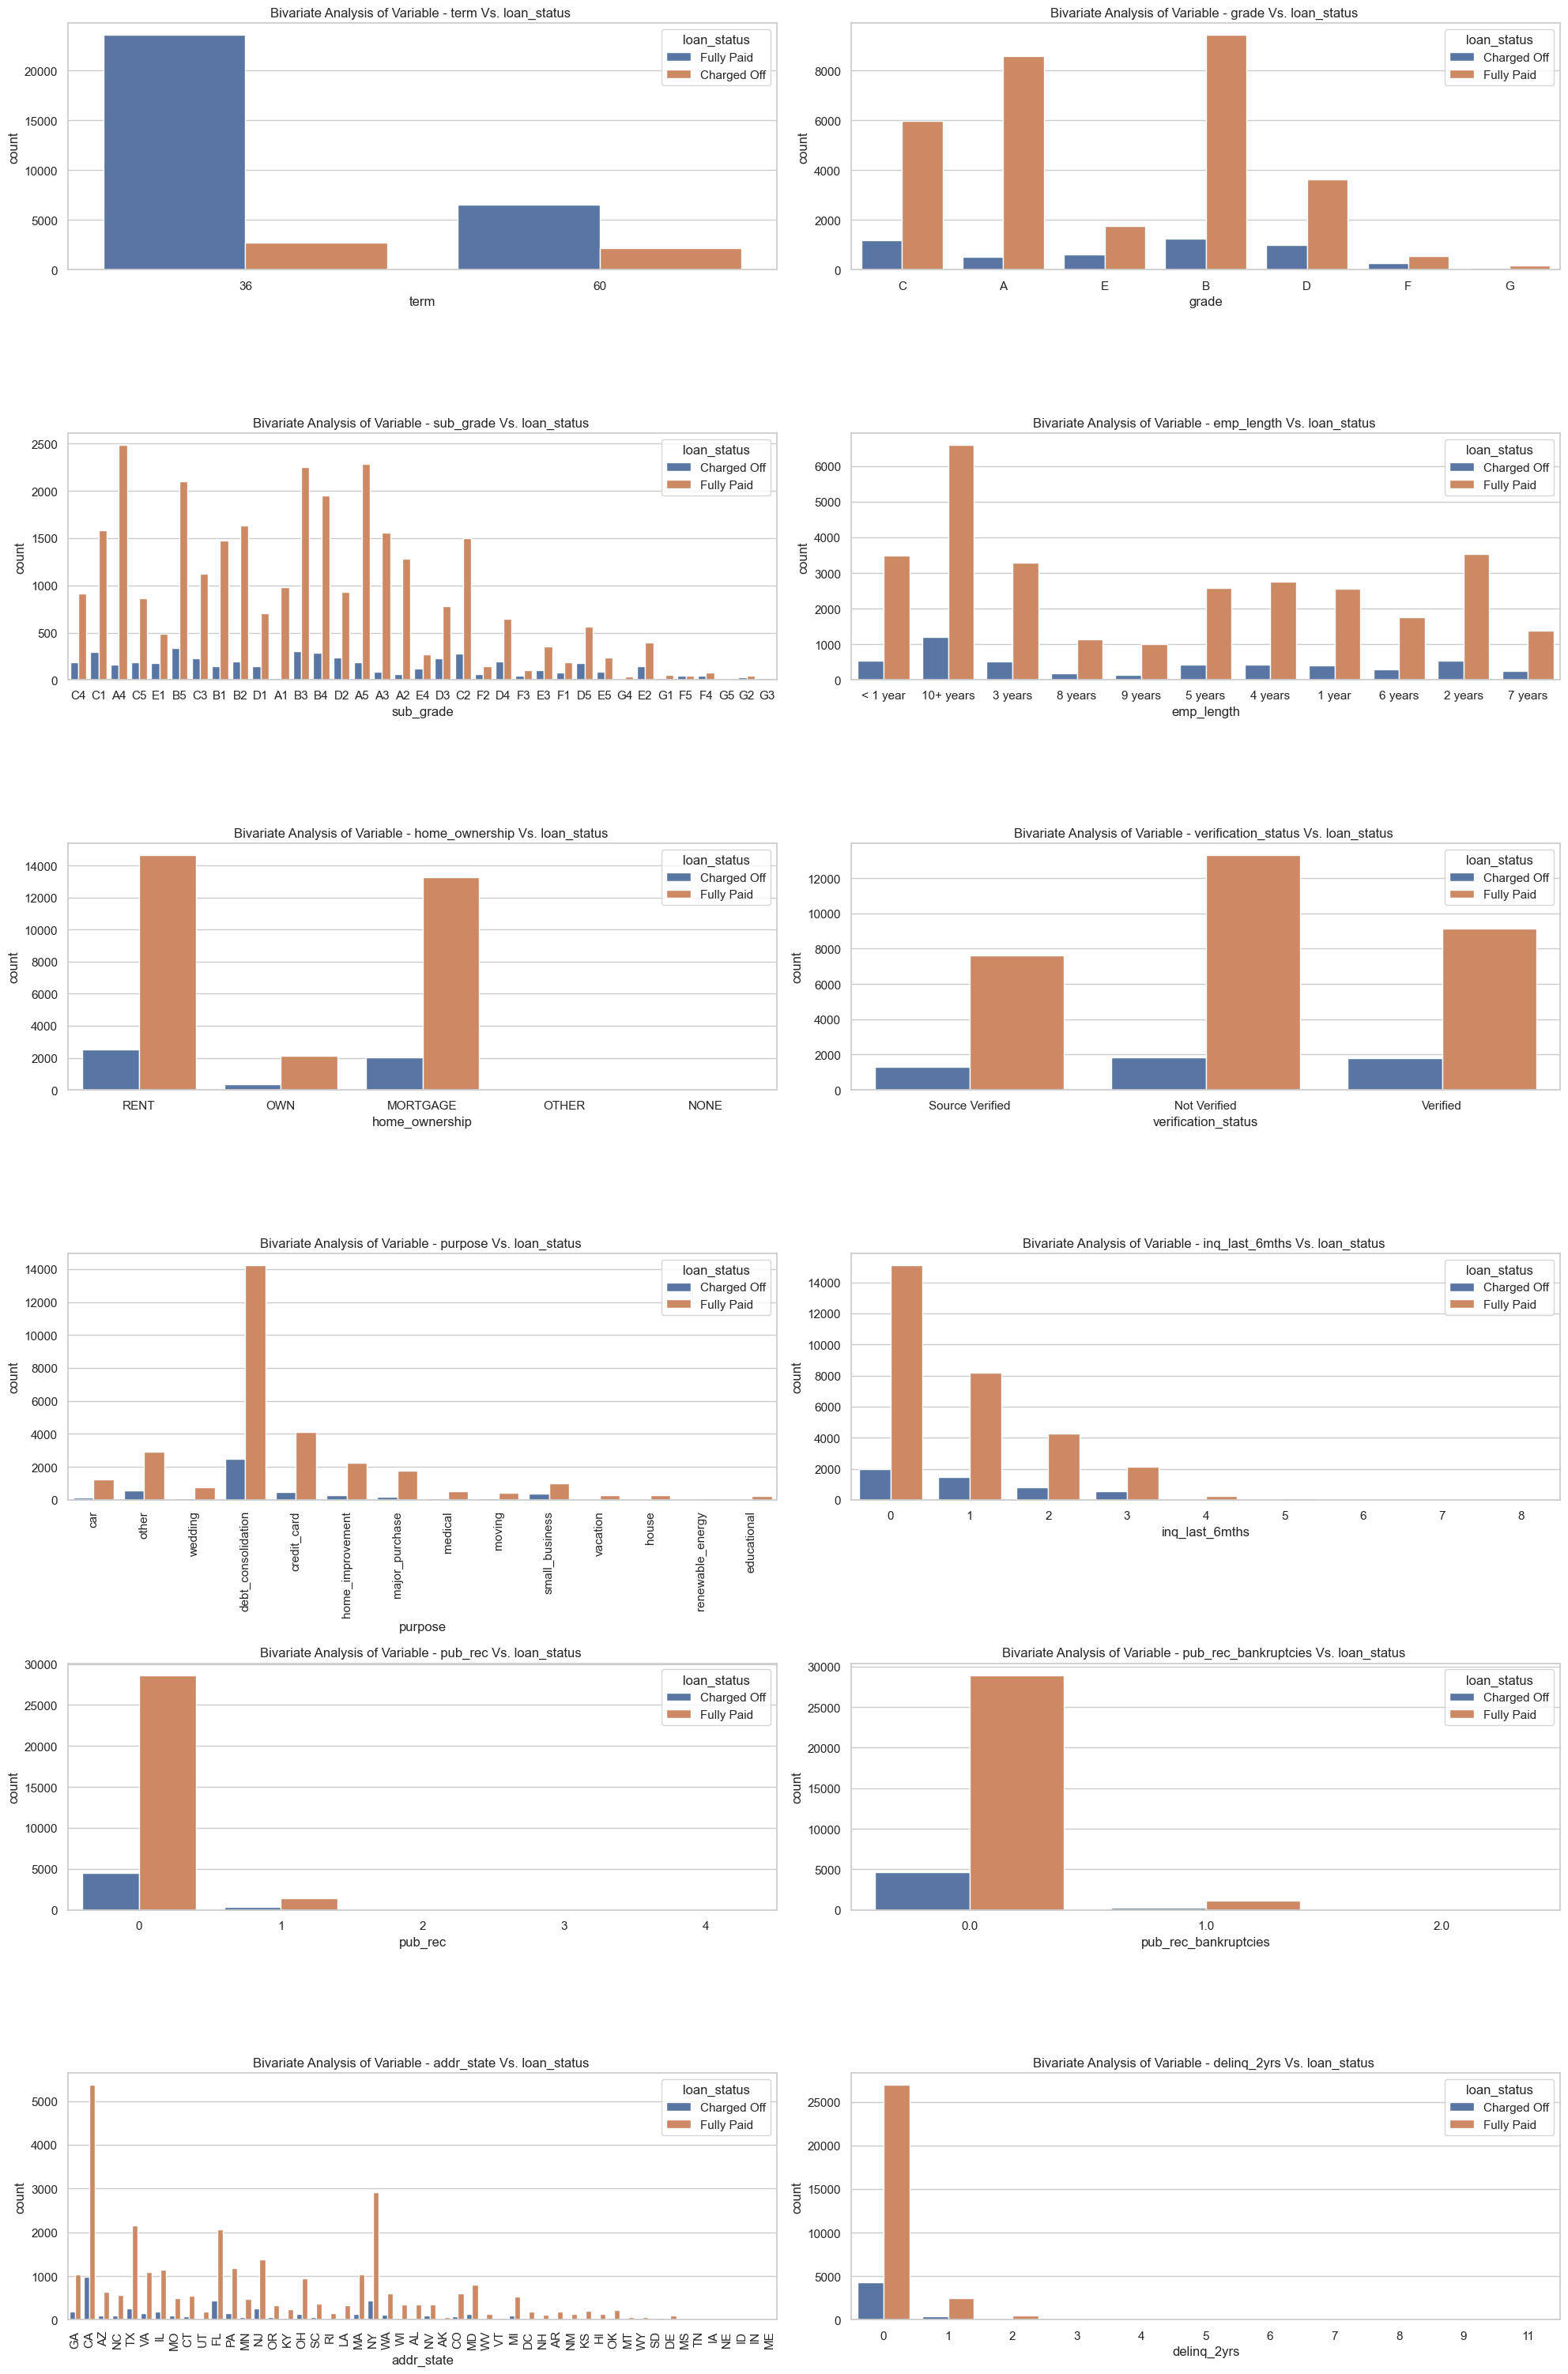

In [327]:
# Categorical Vs Categorical
plt.figure(figsize=(20,40))
for ax , col in enumerate(cat_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.countplot(data=loan[cat_cols] , hue=loan["loan_status"] , x=loan[col] , palette='deep' )
    plt.title( f'Bivariate Analysis of Variable - {col} Vs. loan_status ' )
    if col in ('purpose','addr_state') :
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Observations - 
1. <b> Variable - emp_length </b> - From the above plot, although it can be seen that people with 10+ experience pay off their loans much more, but they default on the loans as well to quite an extent. The loan defaults steadily increase from 1-3 years and then falls and has a big spike on 10+.
2. <b> Variable - term </b> - most loans issued for 36 months are fully paid.
3. <b> Variable - grade </b> - We can see that most of the loans from all the grades are coming under default list. So, no strong relation is found between loan_status and grades of members.
4. <b>Variable - add_state </b>: California (CA) has the highest number of loan applications, with more fully paid loans and more charged off loans compared to other states.This version succinctly highlights the key points about the add_state variable and its relationship to loan status in California.
5. <b>Variable - pub_rec_bankruptcies</b>: The average number of public record bankruptcies varies across different loan statuses. Loans that are charged off have a higher average number of bankruptcies (0.067), compared to loans that are fully paid (0.039) and those that are currently active (0.036).
6. <b> Variable - purpose </b> : The majority of the loans issued are for debt consolidation, and default loans are also primarily for this purpose.
7. <b> Variable - home_ownership </b> :  Applicants who own their homes outright are less prone to default compared to renters and mortgage holders, as indicated by the lower count of default loans  in the "OWN" category compared to renters and mortgage holders.
8. <b> Variable - inq_last_6mths </b> : There appears to be an inverse relationship between the number of inquiries in the last 6 months and the likelihood of a loan being charged off. 

### Relation with State and Population

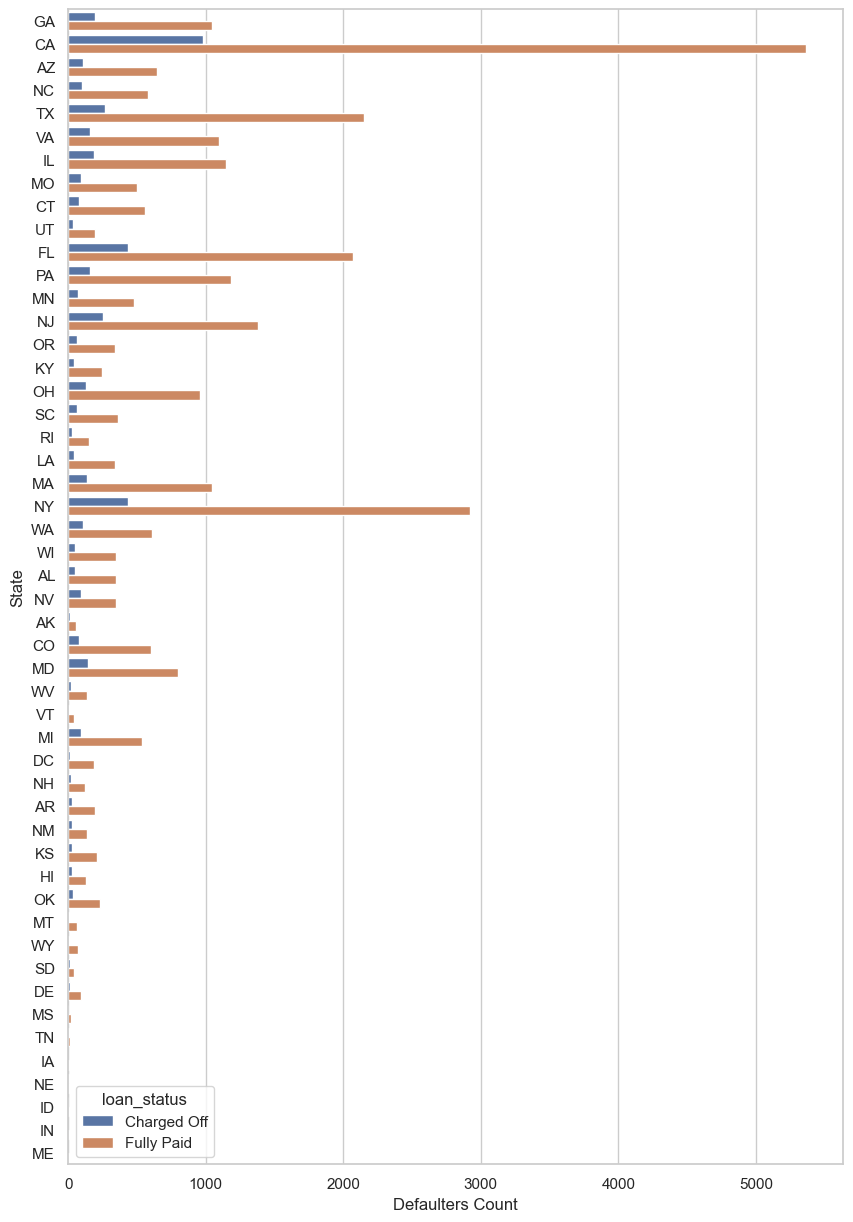

In [370]:
##Defaulters Count from State
###state = loan[loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,15))
sns.countplot(y='addr_state', hue='loan_status', data=loan , palette='deep')
plt.xlabel('Defaulters Count')
plt.ylabel('State')
plt.show()

<b> Variable - add_state </b> : CA (California) has the highest count of loan statuses, with 1,125 entries. NY (New York) follows with 495 entries. FL (Florida) has 504 entries.Several states have relatively low counts, such as ID (Idaho) with only 1 entry and NE (Nebraska) with 3 entries.States with higher populations and economic activity, such as California, New York, and Florida, tend to have higher counts of loan statuses.

### Changes in variables over years and months 

#### Loans issued per month and year

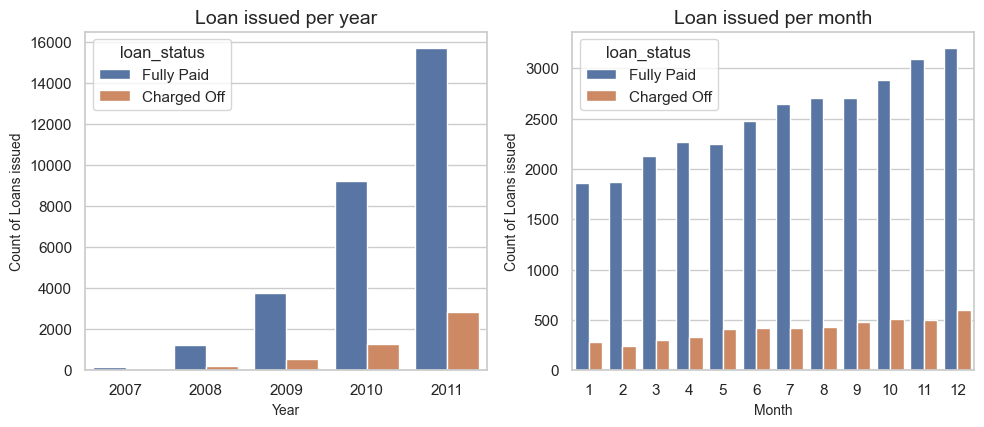

In [346]:
# Count plot for issue year
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax1 = sns.countplot(data = loan , x=loan['issue_d_year'] , hue=loan["loan_status"], palette='deep')
ax1.set_title('Loan issued per year',fontsize=14)
ax1.set_ylabel('Count of Loans issued',fontsize =10)
ax1.set_xlabel('Year',fontsize =10) 

# Count plot for issue month
plt.subplot(2,2,2)
ax2 = sns.countplot(data = loan , x=loan['issue_d_month'] , hue=loan["loan_status"], palette='deep')
ax2.set_title('Loan issued per month',fontsize=14)
ax2.set_ylabel('Count of Loans issued',fontsize =10)
ax2.set_xlabel('Month',fontsize =10)  
plt.tight_layout()
plt.show()

#### Terms opted by the borrower over the years and months

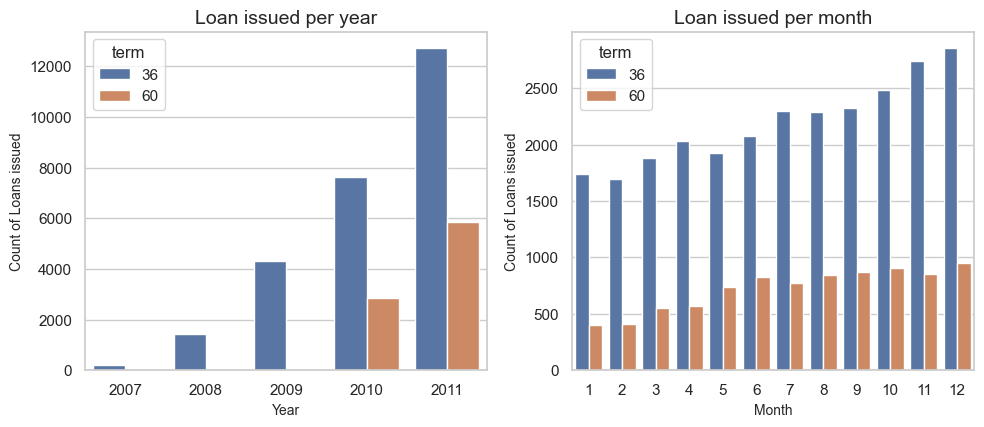

In [347]:
# Count plot for issue year
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax1 = sns.countplot(data = loan , x=loan['issue_d_year'] , hue=loan["term"], palette='deep')
ax1.set_title('Loan issued per year',fontsize=14)
ax1.set_ylabel('Count of Loans issued',fontsize =10)
ax1.set_xlabel('Year',fontsize =10) 

# Count plot for issue month
plt.subplot(2,2,2)
ax2 = sns.countplot(data = loan , x=loan['issue_d_month'] , hue=loan["term"], palette='deep')
ax2.set_title('Loan issued per month',fontsize=14)
ax2.set_ylabel('Count of Loans issued',fontsize =10)
ax2.set_xlabel('Month',fontsize =10)  
plt.tight_layout()
plt.show()

##### Observations -
<b> Variables - issue_d_year , issue_d_month and loan_status </b> :There is a clear increasing trend in the number of loans issued over the years, with a significant rise from 2009 to 2011. For each year number of borrowers keeps on increasing and they opt for 36 months tenure. Loans approved on Q4 are more likely to default.

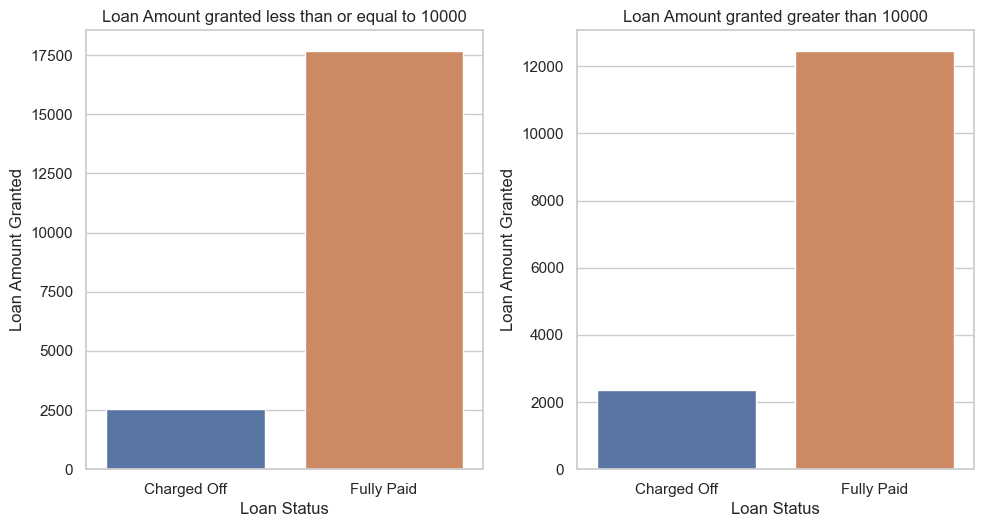

In [379]:
loan_less = loan[loan['loan_amnt'] <= 10000].groupby(['loan_status'])['loan_amnt'].count().reset_index()
loan_greater = loan[loan['loan_amnt'] > 10000].groupby(['loan_status'])['loan_amnt'].count().reset_index()
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
ax1=sns.barplot(x='loan_status', y='loan_amnt', data=loan_less , palette='deep')
ax1.set_title('Loan Amount granted less than or equal to 10000')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')

plt.subplot(2,2,2)
ax2=sns.barplot(x='loan_status', y='loan_amnt', data=loan_greater , palette='deep')
ax2.set_title('Loan Amount granted greater than 10000')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')

plt.tight_layout()
plt.show()

##### Observations -
<b> Variable- loan_amnt </b> : Among loans with amounts less than or equal to 10,000, there are more loans that are fully paid compared to charged off. Among loans with amounts greater than or equal to 10,000, there are also more loans that are fully paid compared to charged off. The proportion of charged off loans appears to be lower in both loan amount categories compared to fully paid loans.

#### Analysis of other variables apart from loan_status

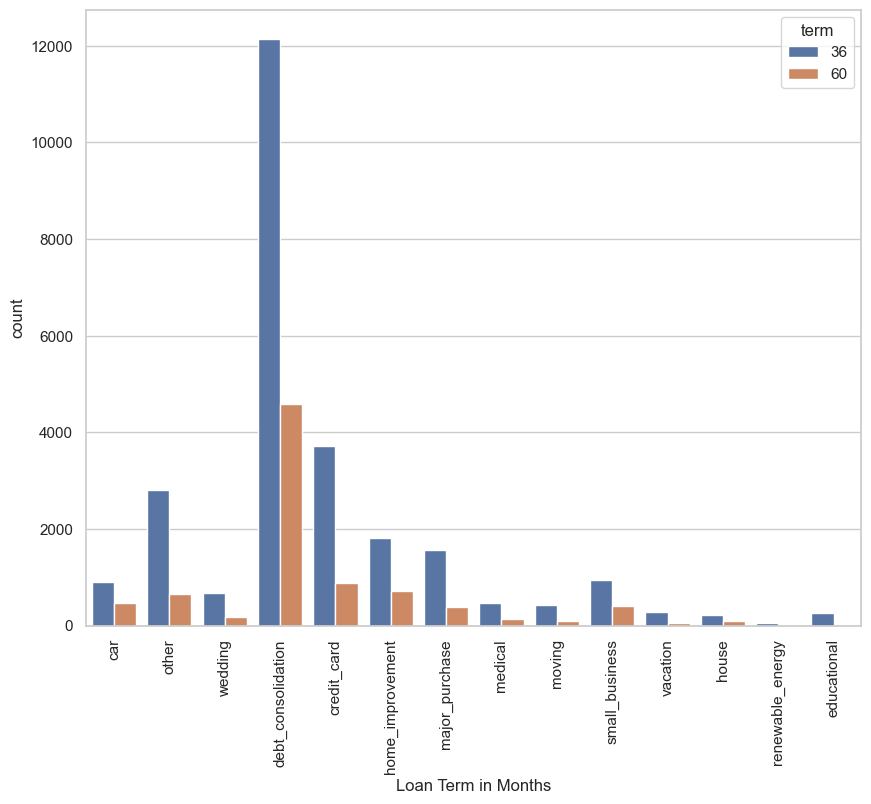

In [363]:
## Loan term and purpose
plt.figure(figsize=[10,8])
sns.countplot( data=loan , x="purpose", hue='term', palette='deep')
plt.xlabel('Loan Term in Months')
plt.xticks(rotation=90)
plt.show()

#### Check if Interest Rate is dependent on grade

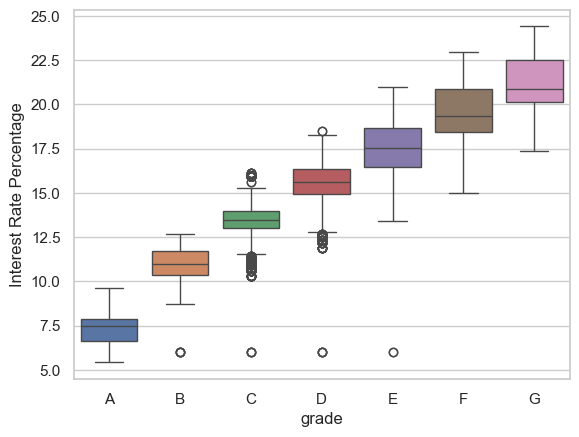

In [374]:
grade_order = sorted(loan['grade'].unique())
sns.boxplot(y='int_rate', x='grade', data=loan , palette='deep' , order=grade_order)
plt.ylabel('Interest Rate Percentage')
plt.show()

#### Observations - 
<b> Variables - grade and interest rate </b> : There appears to be an inverse relationship between the grade of the Borrowers and the interest rate. Borrowers with higher credit grades tend to receive lower interest rates for their loans.

## Multivariate Analysis

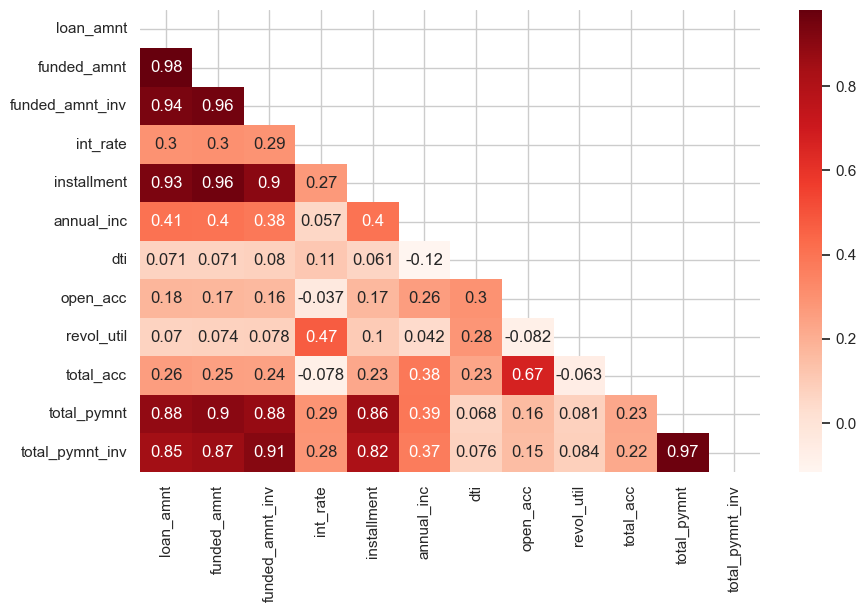

In [383]:
plt.figure(figsize=(10,6))
mask = np.triu(loan[num_cols].corr())
sns.heatmap(loan[num_cols].corr(),mask=mask,annot=True,cmap="Reds")
plt.show()

#### Observations-
#### For Charged Off loans -
1. loan_amnt, funded_amnt_inv, and installment have strong positive correlations, indicating that higher loan amounts and funded amounts are associated with higher installments.
2. int_rate has a moderate positive correlation with revol_util, suggesting that higher interest rates are associated with higher revolving line utilization rates.

In [385]:
loans_defaults=loan[ loan['loan_status'] =='Charged Off']
loans_defaults.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
1        2500         2500           2500.0    60     15.27        59.83   
9        5375         5375           5350.0    60     12.69       121.45   
12       9000         9000           9000.0    36     13.49       305.38   
14      10000        10000          10000.0    36     10.65       325.74   
21      21000        21000          21000.0    36     12.42       701.73   

   grade sub_grade emp_length home_ownership  annual_inc verification_status  \
1      C        C4   < 1 year           RENT     30000.0     Source Verified   
9      B        B5   < 1 year           RENT     15000.0            Verified   
12     C        C1   < 1 year           RENT     30000.0     Source Verified   
14     B        B2    3 years           RENT    100000.0     Source Verified   
21     B        B4  10+ years           RENT    105000.0            Verified   

      issue_d  loan_status             purpose addr_state    dti  delinq_2yrs  \
1  2011-12-01  Charged Off                 car         GA   1.00            0   
9  2011-12-01  Charged Off               other         TX  18.08            0   
12 2011-12-01  Charged Off  debt_consolidation         VA  10.08            0   
14 2011-12-01  Charged Off               other         CA   7.06            0   
21 2011-12-01  Charged Off  debt_consolidation         FL  13.22            0   

   earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
1        1999-04-01               5         3        0         9.4          4   
9        2004-09-01               0         2        0        36.5          3   
12       2004-04-01               1         4        0        91.7          9   
14       1991-05-01               2        14        0        55.5         29   
21       1983-02-01               0         7        0        90.3         38   

    total_pymnt  total_pymnt_inv  pub_rec_bankruptcies  emp_length_dict  \
1       1008.71          1008.71                   0.0                0   
9       1476.19          1469.34                   0.0                0   
12      2270.70          2270.70                   0.0                0   
14      7471.99          7471.99                   0.0                3   
21     14025.40         14025.40                   0.0               10   

    issue_d_month  issue_d_year  earliest_cr_line_month  earliest_cr_line_year  
1              12          2011                       4                   1999  
9              12          2011                       9                   2004  
12             12          2011                       4                   2004  
14             12          2011                       5                   1991  
21             12          2011                       2                   1983

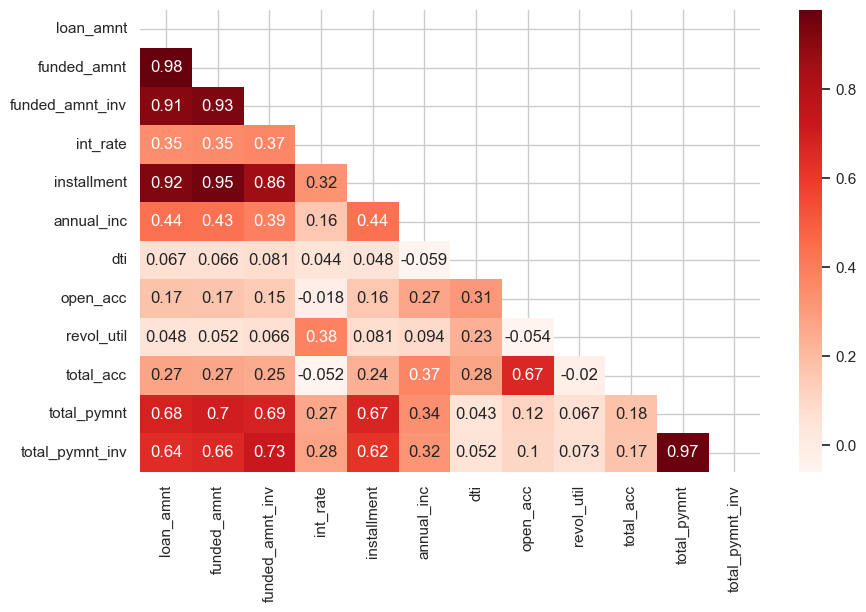

In [386]:
plt.figure(figsize=(10,6))
mask = np.triu(loans_defaults[num_cols].corr())
sns.heatmap(loans_defaults[num_cols].corr(),mask=mask,annot=True,cmap="Reds")
plt.show()

#### Observations-
#### For Charged Off loans -
1. loan_amnt, funded_amnt_inv, and installment have strong positive correlations, indicating that higher loan amounts and funded amounts are associated with higher installments.
2. int_rate has a moderate positive correlation with revol_util, suggesting that higher interest rates are associated with higher revolving line utilization rates.

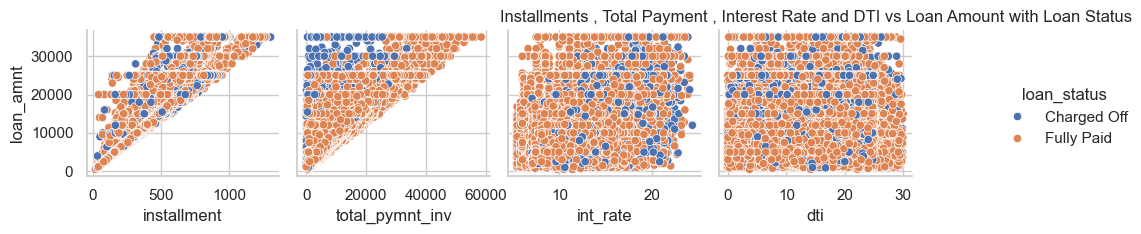

In [429]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' ,'dti' vs loan amount by loan status as hue
sns.pairplot(loan,x_vars=['installment', 'total_pymnt_inv', 'int_rate' ,'dti'],y_vars=['loan_amnt'],hue='loan_status',kind='scatter',palette='deep',aspect=0.8)
plt.title('Installments , Total Payment , Interest Rate and DTI vs Loan Amount with Loan Status')
plt.tight_layout()
plt.show()

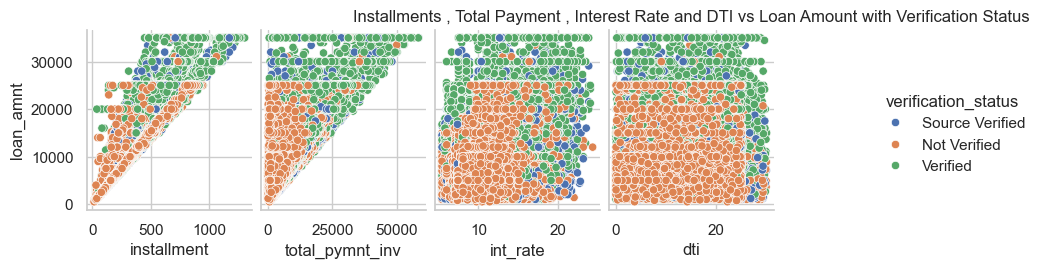

In [428]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate','dti' vs loan amount by verification status as hue
sns.pairplot(loan,x_vars=['installment', 'total_pymnt_inv', 'int_rate','dti'],y_vars=['loan_amnt'],hue='verification_status',kind='scatter',palette='deep',aspect=0.8)
plt.title('Installments , Total Payment , Interest Rate and DTI vs Loan Amount with Verification Status')
plt.tight_layout()
plt.show()

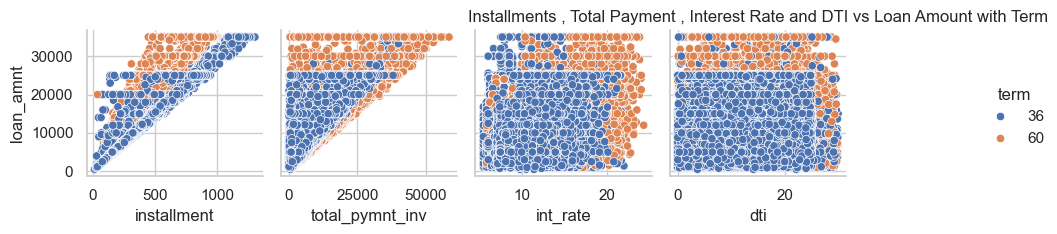

In [433]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' ,'dti' vs loan amount by term as hue
sns.pairplot(loan,x_vars=['installment', 'total_pymnt_inv', 'int_rate','dti'],y_vars=['loan_amnt'],hue='term',kind='scatter',palette='deep',aspect=0.8)
plt.title('Installments , Total Payment , Interest Rate and DTI vs Loan Amount with Term', loc='center')
plt.tight_layout()
plt.show()

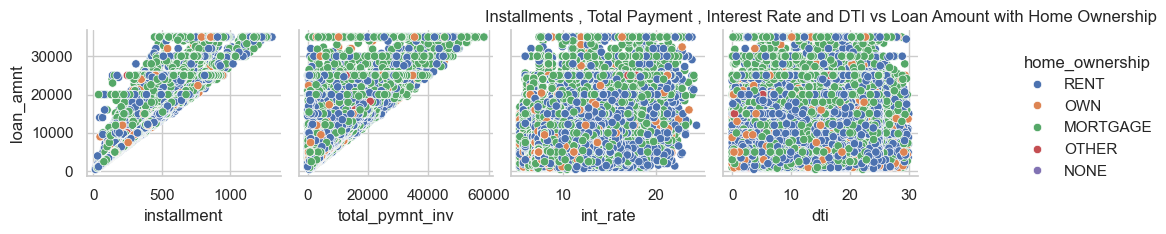

In [448]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' ,'dti' vs loan amount by home_o as hue
sns.pairplot(loan,x_vars=['installment', 'total_pymnt_inv', 'int_rate','dti'],y_vars=['loan_amnt'],hue='home_ownership',kind='scatter',palette='deep',aspect=0.8)
plt.title('Installments , Total Payment , Interest Rate and DTI vs Loan Amount with Home Ownership', loc='center')
plt.tight_layout()
plt.show()

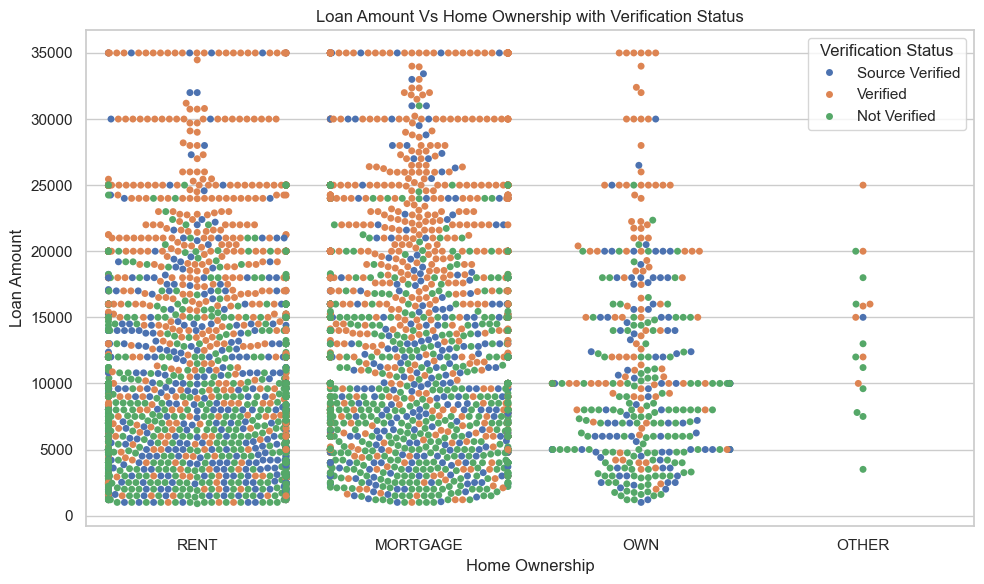

In [436]:
# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=loans_defaults, x='home_ownership', y='loan_amnt', hue='verification_status', palette='deep')
plt.title('Only Default Loans - Loan Amount Vs Home Ownership with Verification Status')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.legend(title='Verification Status')
plt.tight_layout()
plt.show()

In [447]:
loan_fpaid=loan[loan['loan_status']=="Fully Paid"]
loan_fpaid.shape

(30106, 32)

#### Observations -
1. When the loan amount increases, number of installment, total_pymnt_inv, int_rate also increases.
2. When the loan amount and int_rate increases , possibility of loans to be charged off increases.
3. Borrowers with low Dti are not verified. 
4. Borrowers with verification status "Not-Verified" are most likely to get loan less than 25k.
5. Borrowers with verification status "Verified" are most likely to get loan greater than 25k.
6. Term of 60 months is chosen or given only for high amount of loans greater than 25k.
7. Borrowers with lower term has higher installments comparatively.
8. Borrowers with 60 months term has highest share to total_pymnt_inv.
9. Across all categories of home ownership, borrowers with loan amount less than 25k are most likely to be source verified.
10. Across all categories of home ownership, borrowers with loan amount greater than 25k gets verified.

### Driving Factors to Charge Off

#### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 
1. Borrowers with high interest and 10+ years of employment length.
##### 2. Borrowers living on mortgage with loan amount greater than 12000.
3. Loan for debt consolidation, credit card, small business with loan amount greater than 12000.
4. For any loan amount provided with an average interest rate higher than 13%.
5. Loan provided for house purpose with average interest grater than 15%.
6. Loan provided with an average of 12.5% interest rate for 36months of tenure.
7. Loan provided with an average of 16.5% interest rate for 60months of tenure.
8. Average loan amount greater than 15000 with grade E, F, G.
9. Installments between 800 - 12000 with average interest greater than 15%.
10. Average interest rate of 17% with installment greater than 12000.

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k 
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%